# T10 Plotting Test Examples

### Rationale

It is hard to write automated tests for live plotting behaviour. Our strategy is to run a live notebook with some mock instrument examples and see if everything behaves the way it should.

In [1]:

import numpy as np
import qcodes as qc
from qcodes.instrument.parameter import ArrayParameter, MultiParameter
from qcodes.tests.instrument_mocks import DummyInstrument
from qcodes.utils.wrappers import do1d, do2d, do1dDiagonal, init

User schema at /Users/jhn/qcodesrc_schema.json not found.User settings won't be validated


In [2]:
# Instruments to measure with

dac = DummyInstrument(name="dac", gates=['ch1', 'ch2'])  # The DAC voltage source
dmm = DummyInstrument(name="dmm", gates=['voltage', 'current'])  # The DMM reader


# the default dummy instrument returns always a constant value, 
# in the following line we make it random 
# just for the looks 
import random
dmm.voltage.get =  lambda: random.randint(0, 100)
dmm.current.get = lambda: 1e-3*np.random.randn()
dmm.current.unit = 'A'

# We add an arrayparameter as well

class MyArray(ArrayParameter):
    """
    Arrayparameter which only purpose it to test that units, setpoints
    and so on are copied correctly to the individual arrays in the datarray.
    """

    def __init__(self, instrument=None, name='testparameter'):
        shape = (25,)
        label = 'this label'
        unit = 'this unit'
        sp_base = tuple(np.linspace(5, 9, 25))
        setpoints = (sp_base,)
        setpoint_names = ('this_setpoint',)
        setpoint_labels = ('this setpoint',)
        setpoint_units = ('this setpointunit',)
        self.get_multiplier = 1  # used to check AutoSIPrefix
        super().__init__(name,
                         shape,
                         instrument,
                         label=label,
                         unit=unit,
                         setpoints=setpoints,
                         setpoint_labels=setpoint_labels,
                         setpoint_names=setpoint_names,
                         setpoint_units=setpoint_units)

    def get(self):
        item = self.get_multiplier*np.random.randn(25)
        self._save_val(item)
        return item
    
dmm.add_parameter('myarray',
                  parameter_class=MyArray)

# We add an arrayparameter as well

class MyMultiParam(MultiParameter):

    def __init__(self, instrument=None, name='testmultiparameter'):
        shapes = ((10,), (10,))
        names = ('this', 'that')
        labels = ('this label', 'that label')
        units = ('this unit', 'that unit')
        sp_base = tuple(np.linspace(7, 12, 10))
        setpoints = ((sp_base,),(sp_base,))
        setpoint_names = (('this_setpoint',), ('this_setpoint',))
        setpoint_labels = (('this setpoint',), ('this setpoint',))
        setpoint_units = (('this setpointunit',),('this setpointunit',))
        self.get_multiplier = 1  # used to check AutoSIPrefix
        super().__init__(name,
                         names,
                         shapes,
                         instrument,
                         labels=labels,
                         units=units,
                         setpoints=setpoints,
                         setpoint_labels=setpoint_labels,
                         setpoint_names=setpoint_names,
                         setpoint_units=setpoint_units)

    def get(self):
        item = (self.get_multiplier*np.random.randn(10),self.get_multiplier*np.random.randn(10))
        self._save_val(item)
        return item
    
dmm.add_parameter('mymultiparameter',
                  parameter_class=MyMultiParam)

station = qc.Station(dac, dmm)

init(mainfolder='PlotTesting',
     sample_name='plottestsample',
     station=station,
     annotate_image=False)


Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/commands.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


In [3]:
station = qc.Station(dac, dmm)

# Finally, we instantiate the experiment. 
init(mainfolder='PlotTesting',
     sample_name='plottestsample',
     station=station,
     annotate_image=False)
# NB: In this test we don't annotate an image, but change False to True to do so

## 1D Graphs

Started at 2017-07-10 17:22:37
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/375'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (50,)
   Measured | dmm_voltage | voltage      | (50,)
Finished at 2017-07-10 17:22:41


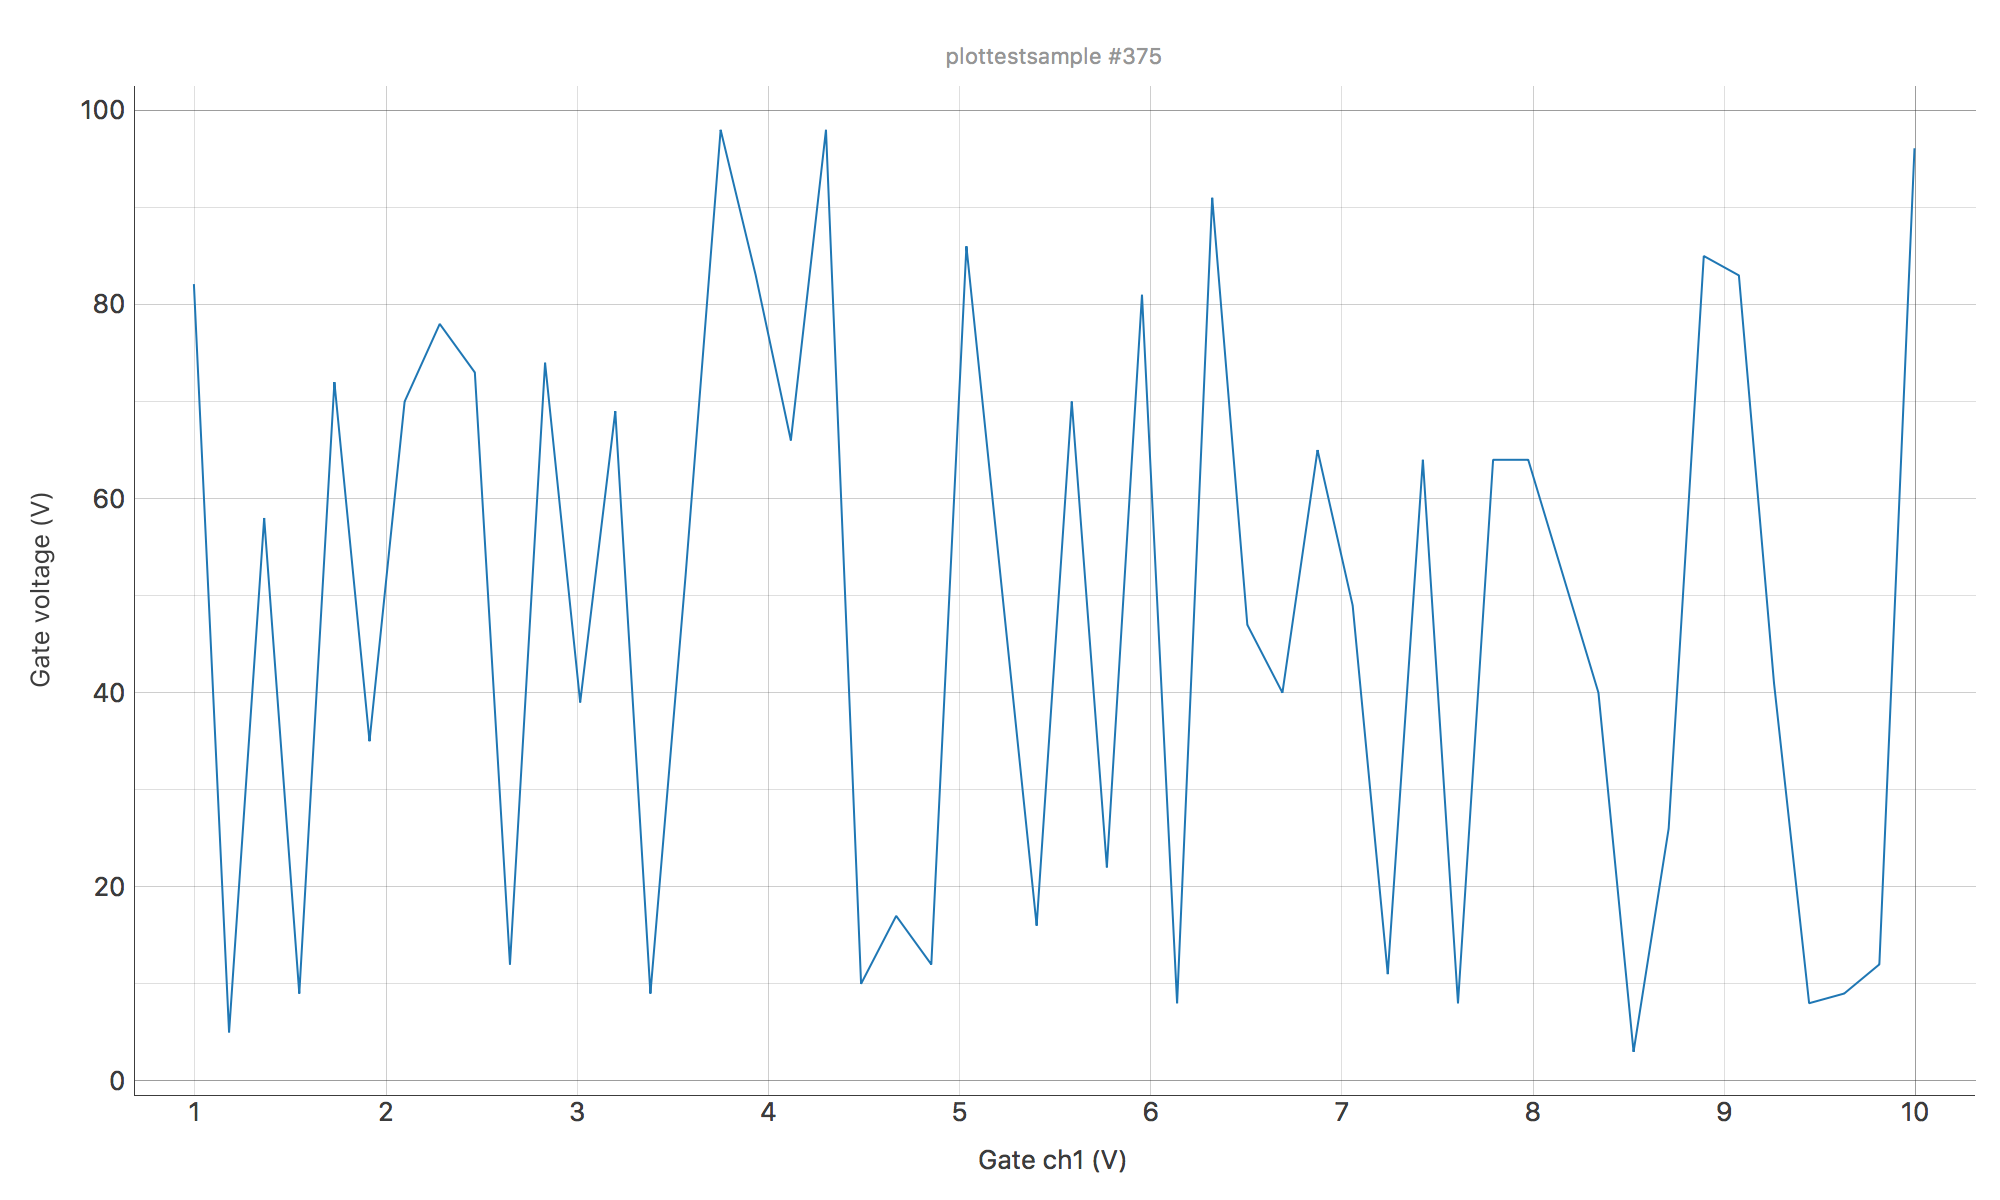

In [4]:
# Normal SI Units, normal interval
# Expected labels: 
#     Y: Gated Voltage (V), X: Gate ch1 (V)
plot, data = do1d(dac.ch1, 1, 10, 50, 0.01, dmm.voltage)
plot

In [5]:
data.arrays.keys()

dict_keys(['dmm_voltage', 'dac_ch1_set'])

Started at 2017-07-10 17:22:57
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/376'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (50,)
   Measured | dmm_voltage | voltage      | (50,)
Finished at 2017-07-10 17:23:00


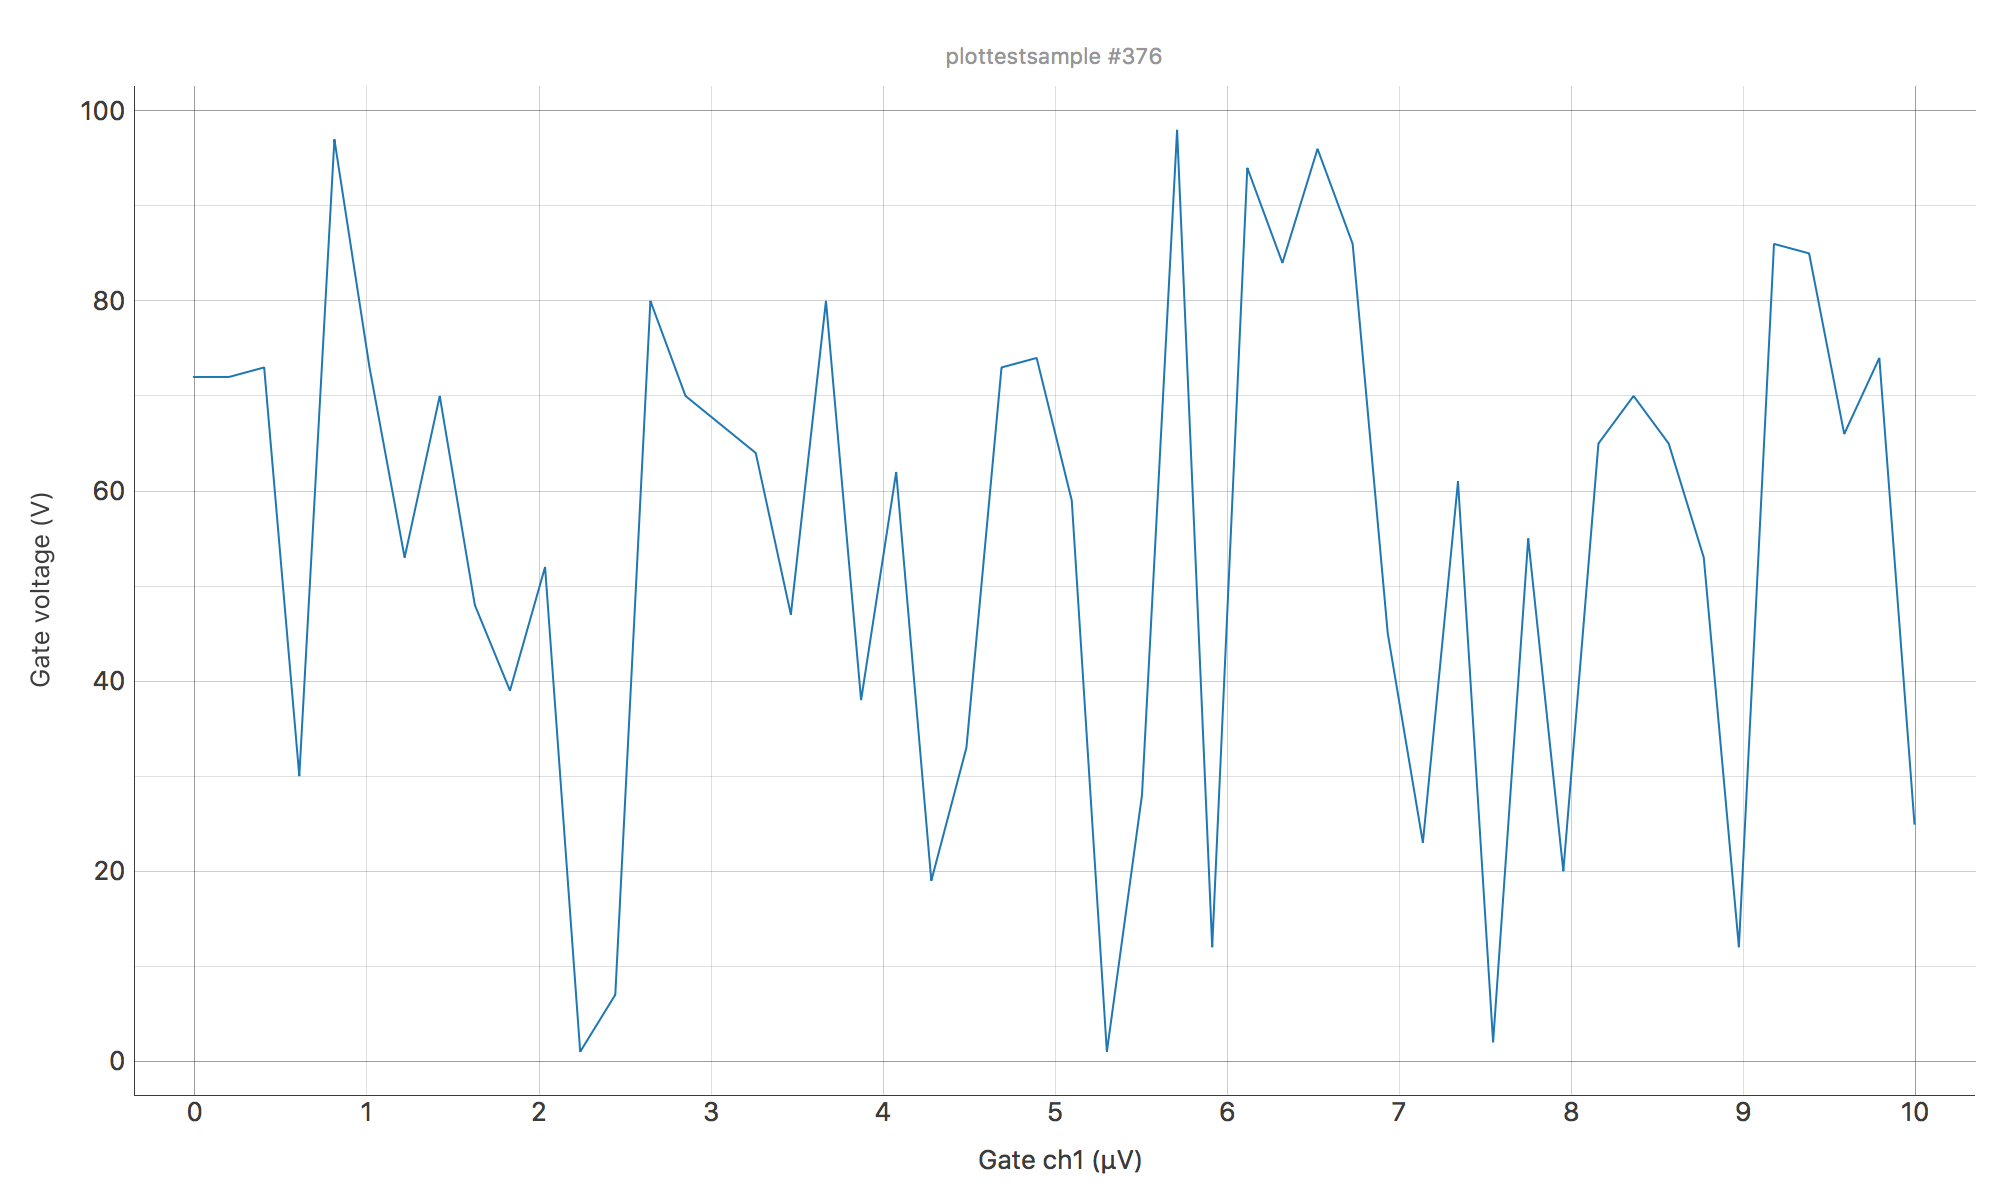

In [6]:
# Normal SI Units, small setpoint range
# Expected labels: 
#     Y: Gated Voltage (V), X: Gate ch1 (μV)
plot, data = do1d(dac.ch1, 0, 10e-6, 50, 0.01, dmm.voltage)
plot

Started at 2017-07-10 17:23:13
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/377'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (50,)
   Measured | dmm_voltage | voltage      | (50,)
Finished at 2017-07-10 17:23:16


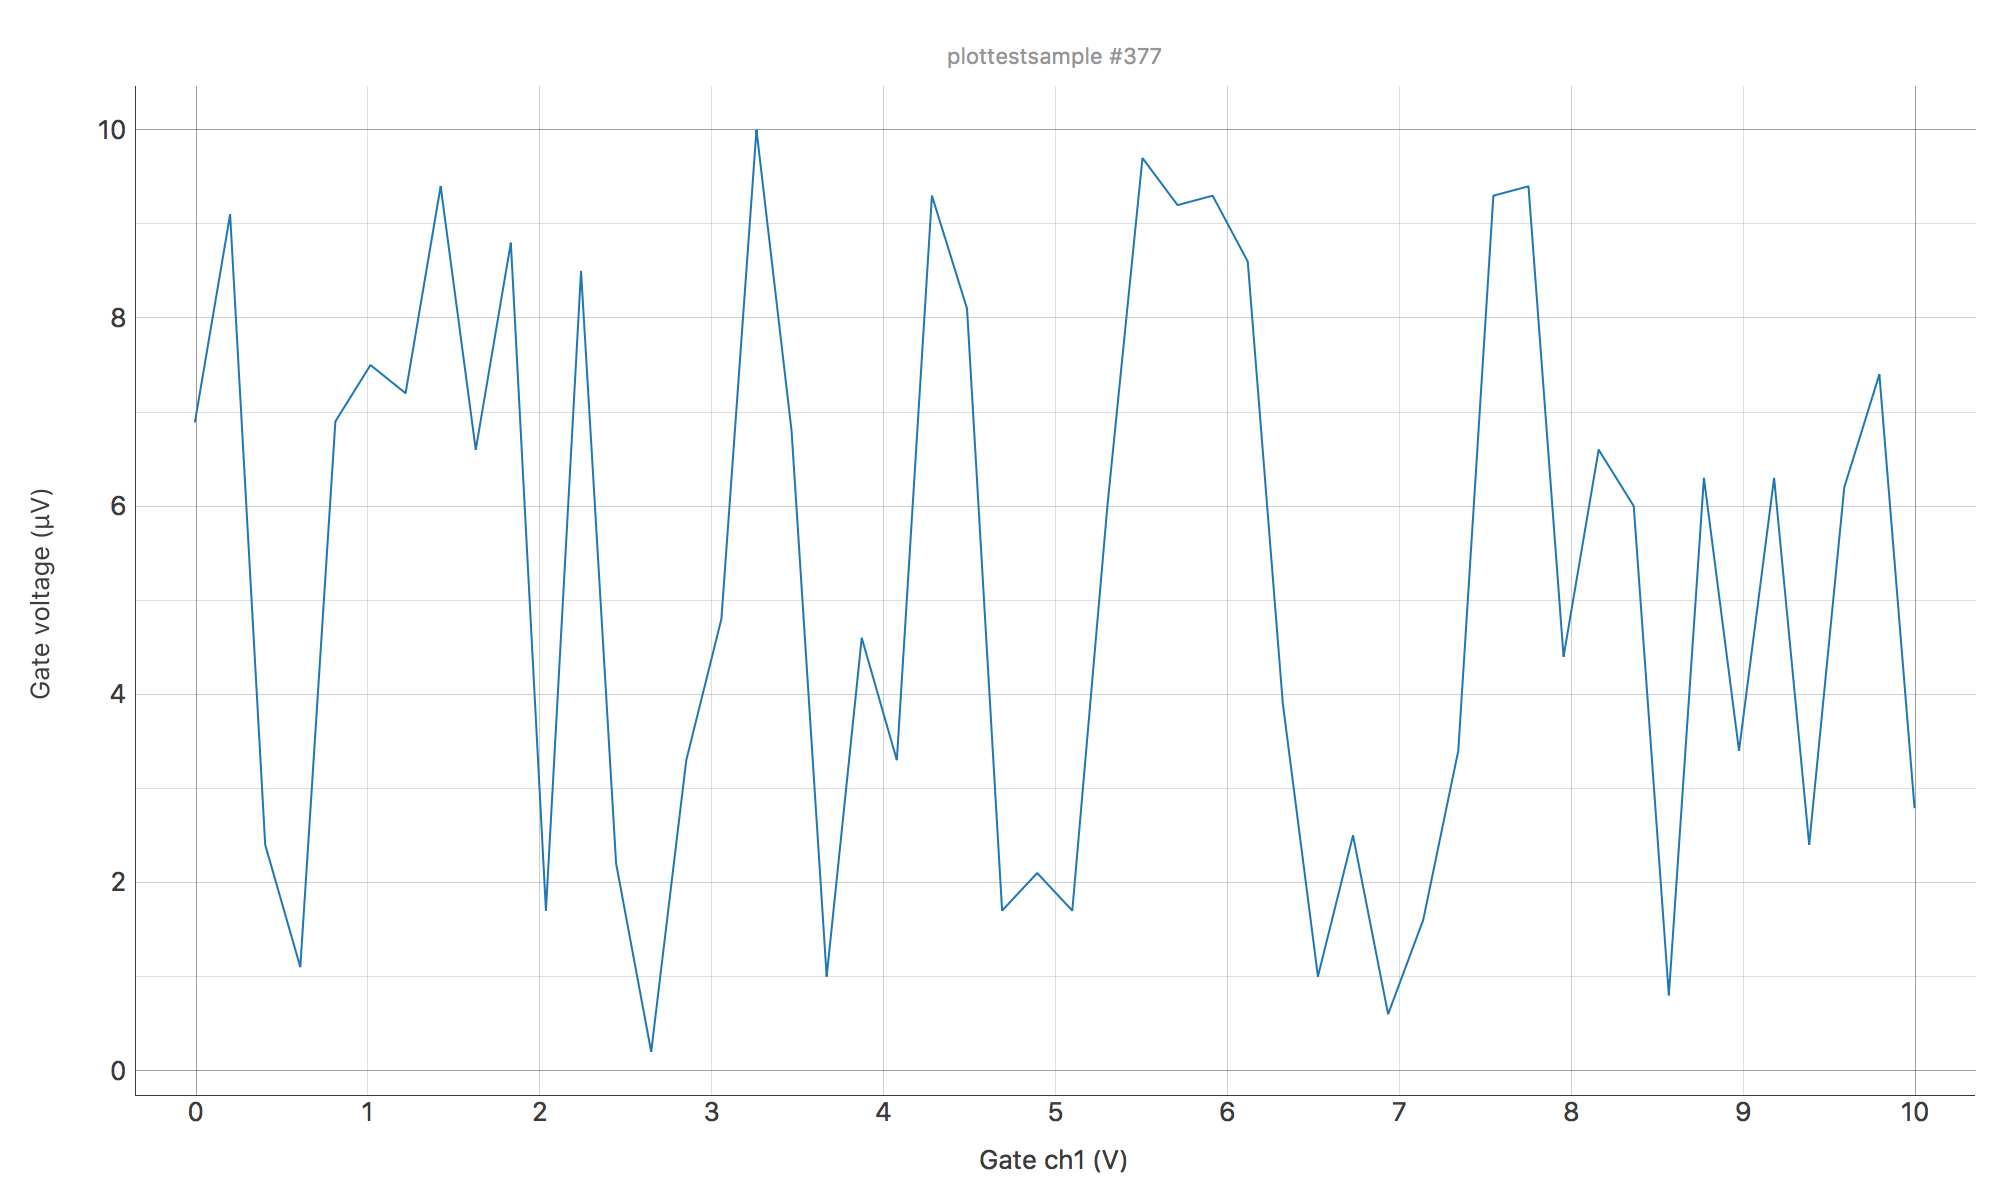

In [7]:
# Normal SI Units, small value range
# Expected labels: 
#     Y: Gated Voltage (uV), X: Gate ch1 (V)
dmm.voltage.get =  lambda: 1e-7*random.randint(0, 100)
plot, data = do1d(dac.ch1, 0, 10, 50, 0.01, dmm.voltage)
dmm.voltage.get =  lambda: random.randint(0, 100)
plot

Started at 2017-07-10 17:24:29
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/378'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (50,)
   Measured | dmm_voltage | voltage      | (50,)
Finished at 2017-07-10 17:24:32


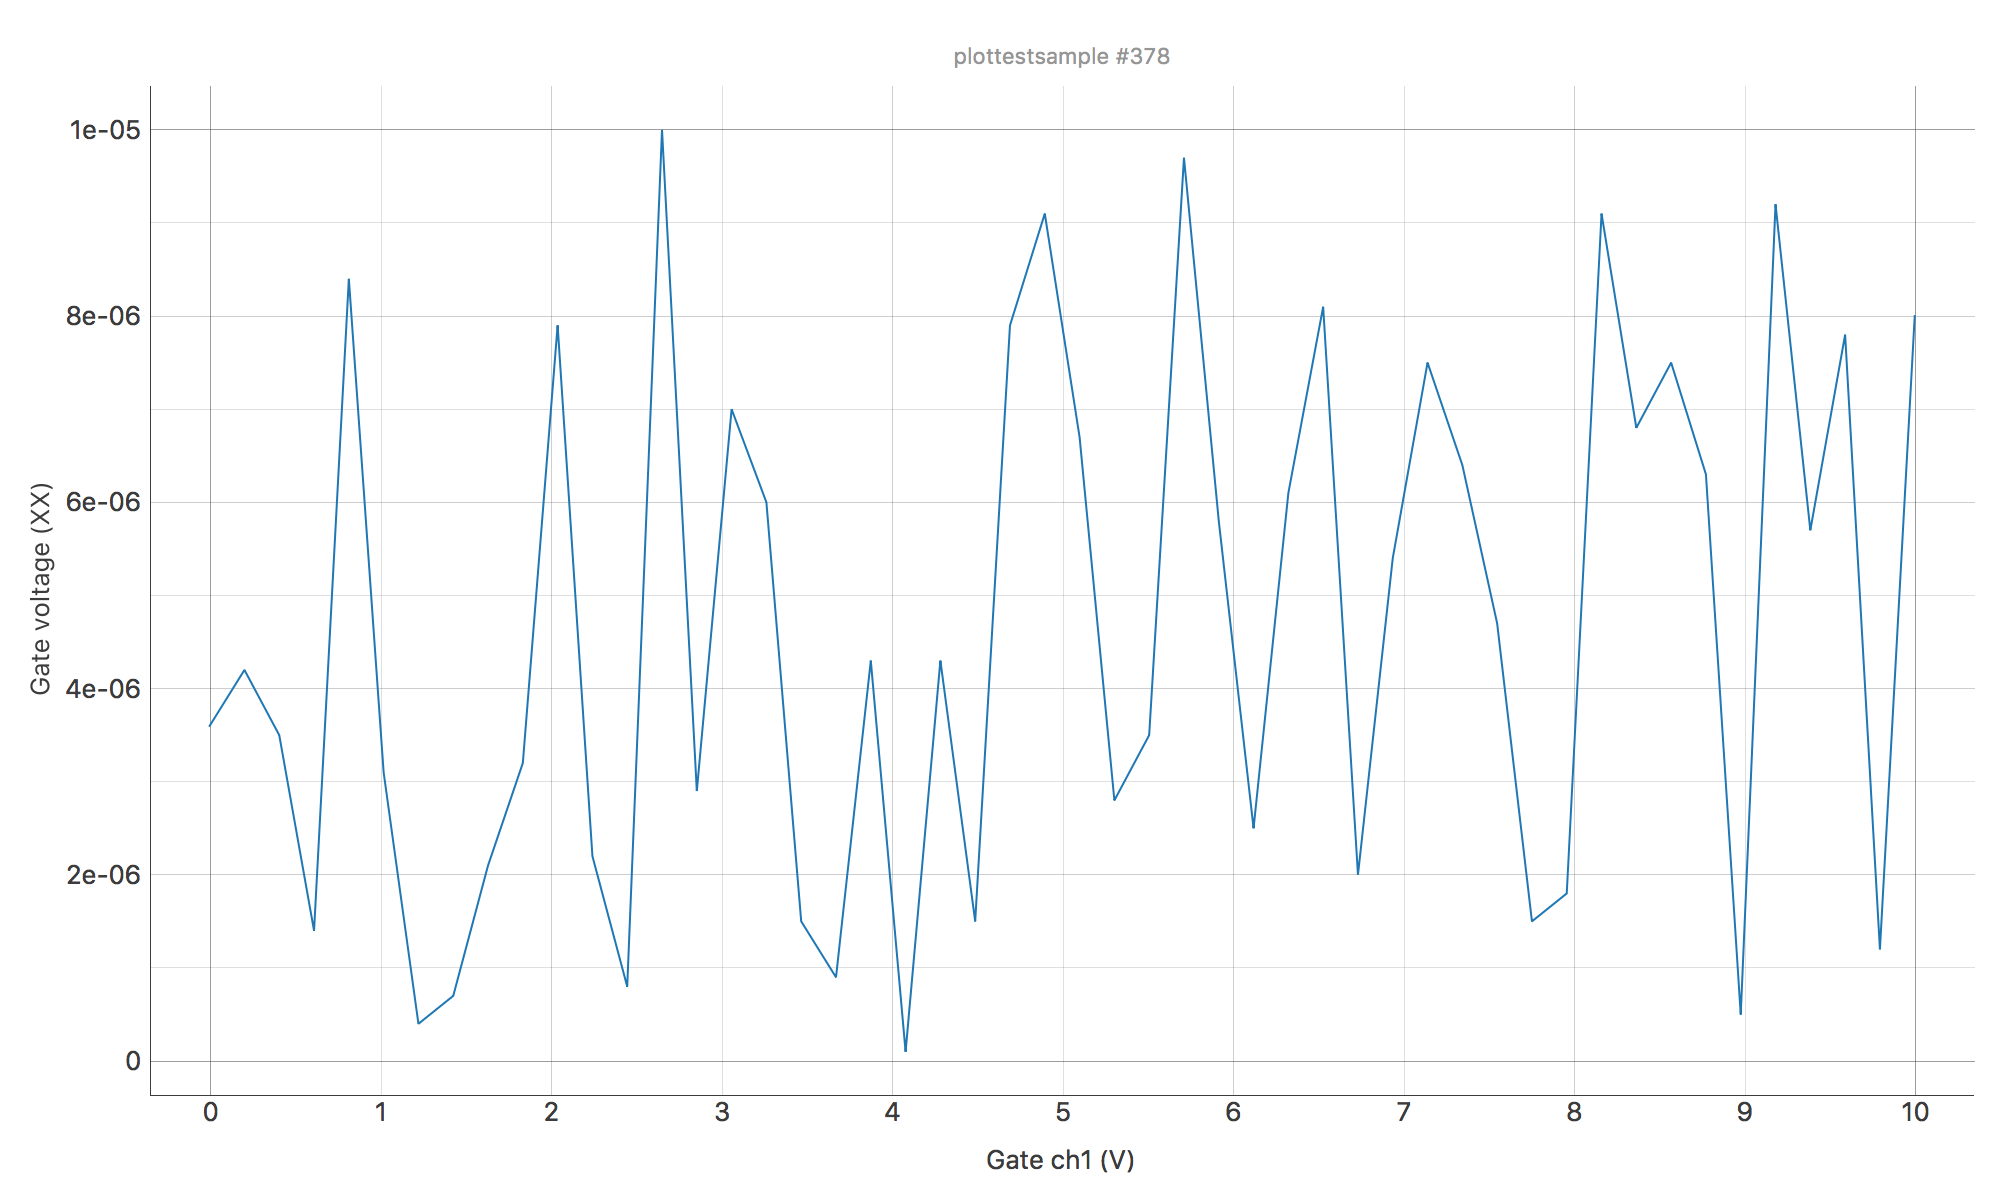

In [9]:
# Exceptional Units, small setpoint range
# Expected labels: 
#     Y: Gated Voltage (XX), X: Gate ch1 (V)
dmm.voltage.get =  lambda: 1e-7*random.randint(0, 100)
dmm.voltage.unit = 'XX'
plot, data = do1d(dac.ch1, 0, 10, 50, 0.01, dmm.voltage)
dmm.voltage.get =  lambda: random.randint(0, 100)
dmm.voltage.unit = 'V'
plot

Started at 2017-07-10 17:24:39
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/379'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (50,)
   Measured | dmm_voltage | voltage      | (50,)
Finished at 2017-07-10 17:24:42


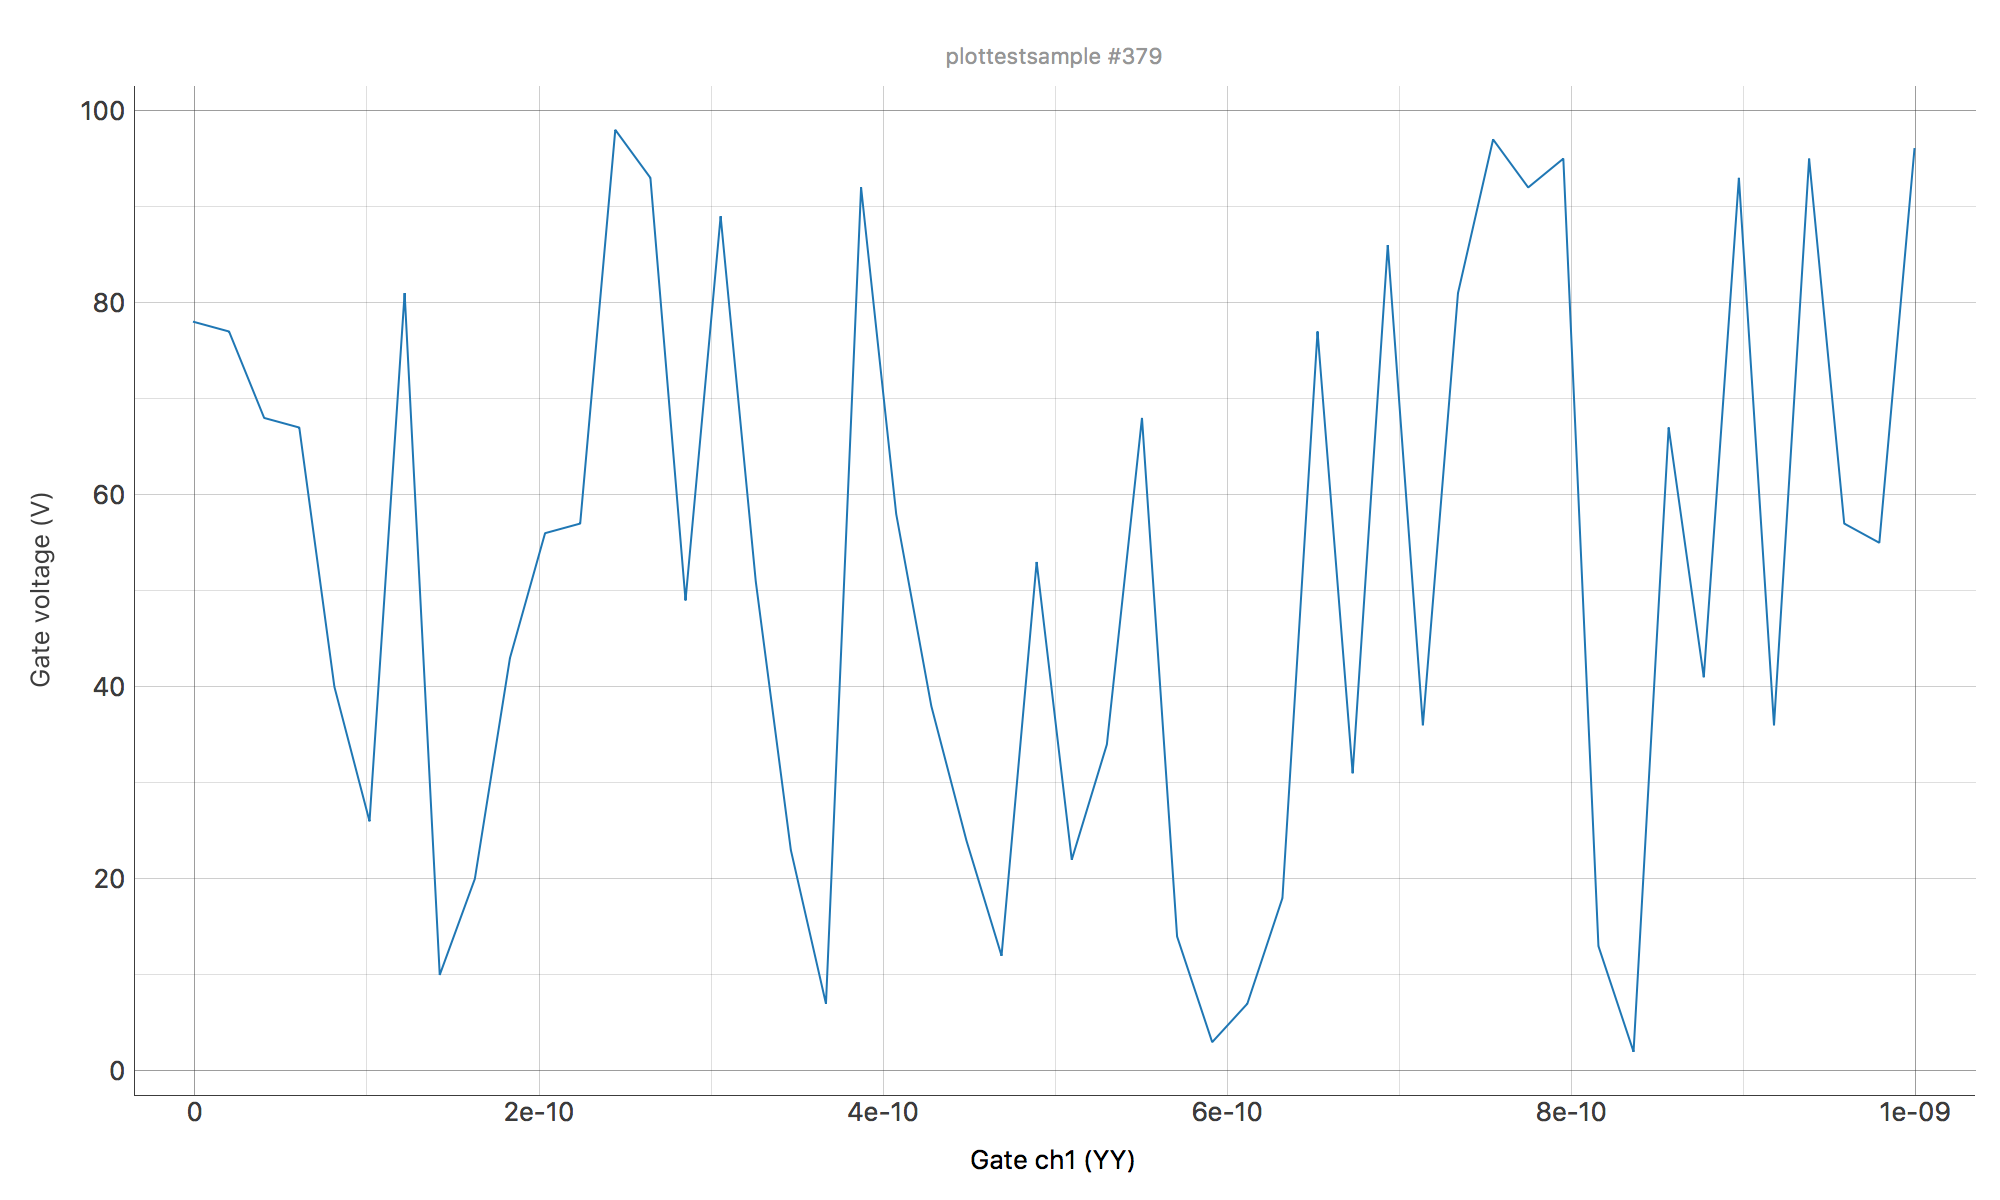

In [10]:
# Exceptional Units, small set range
# Expected labels: 
#     Y: Gated Voltage (V), X: Gate ch1 (YY)
dac.ch1.unit = 'YY'
plot, data = do1d(dac.ch1, 0, 10e-7, 50, 0.01, dmm.voltage)
dac.ch1.unit = 'V'
plot

Started at 2017-07-10 17:24:49
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/380'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (10,)
   Measured | dmm_voltage | voltage      | (10,)
Finished at 2017-07-10 17:25:00


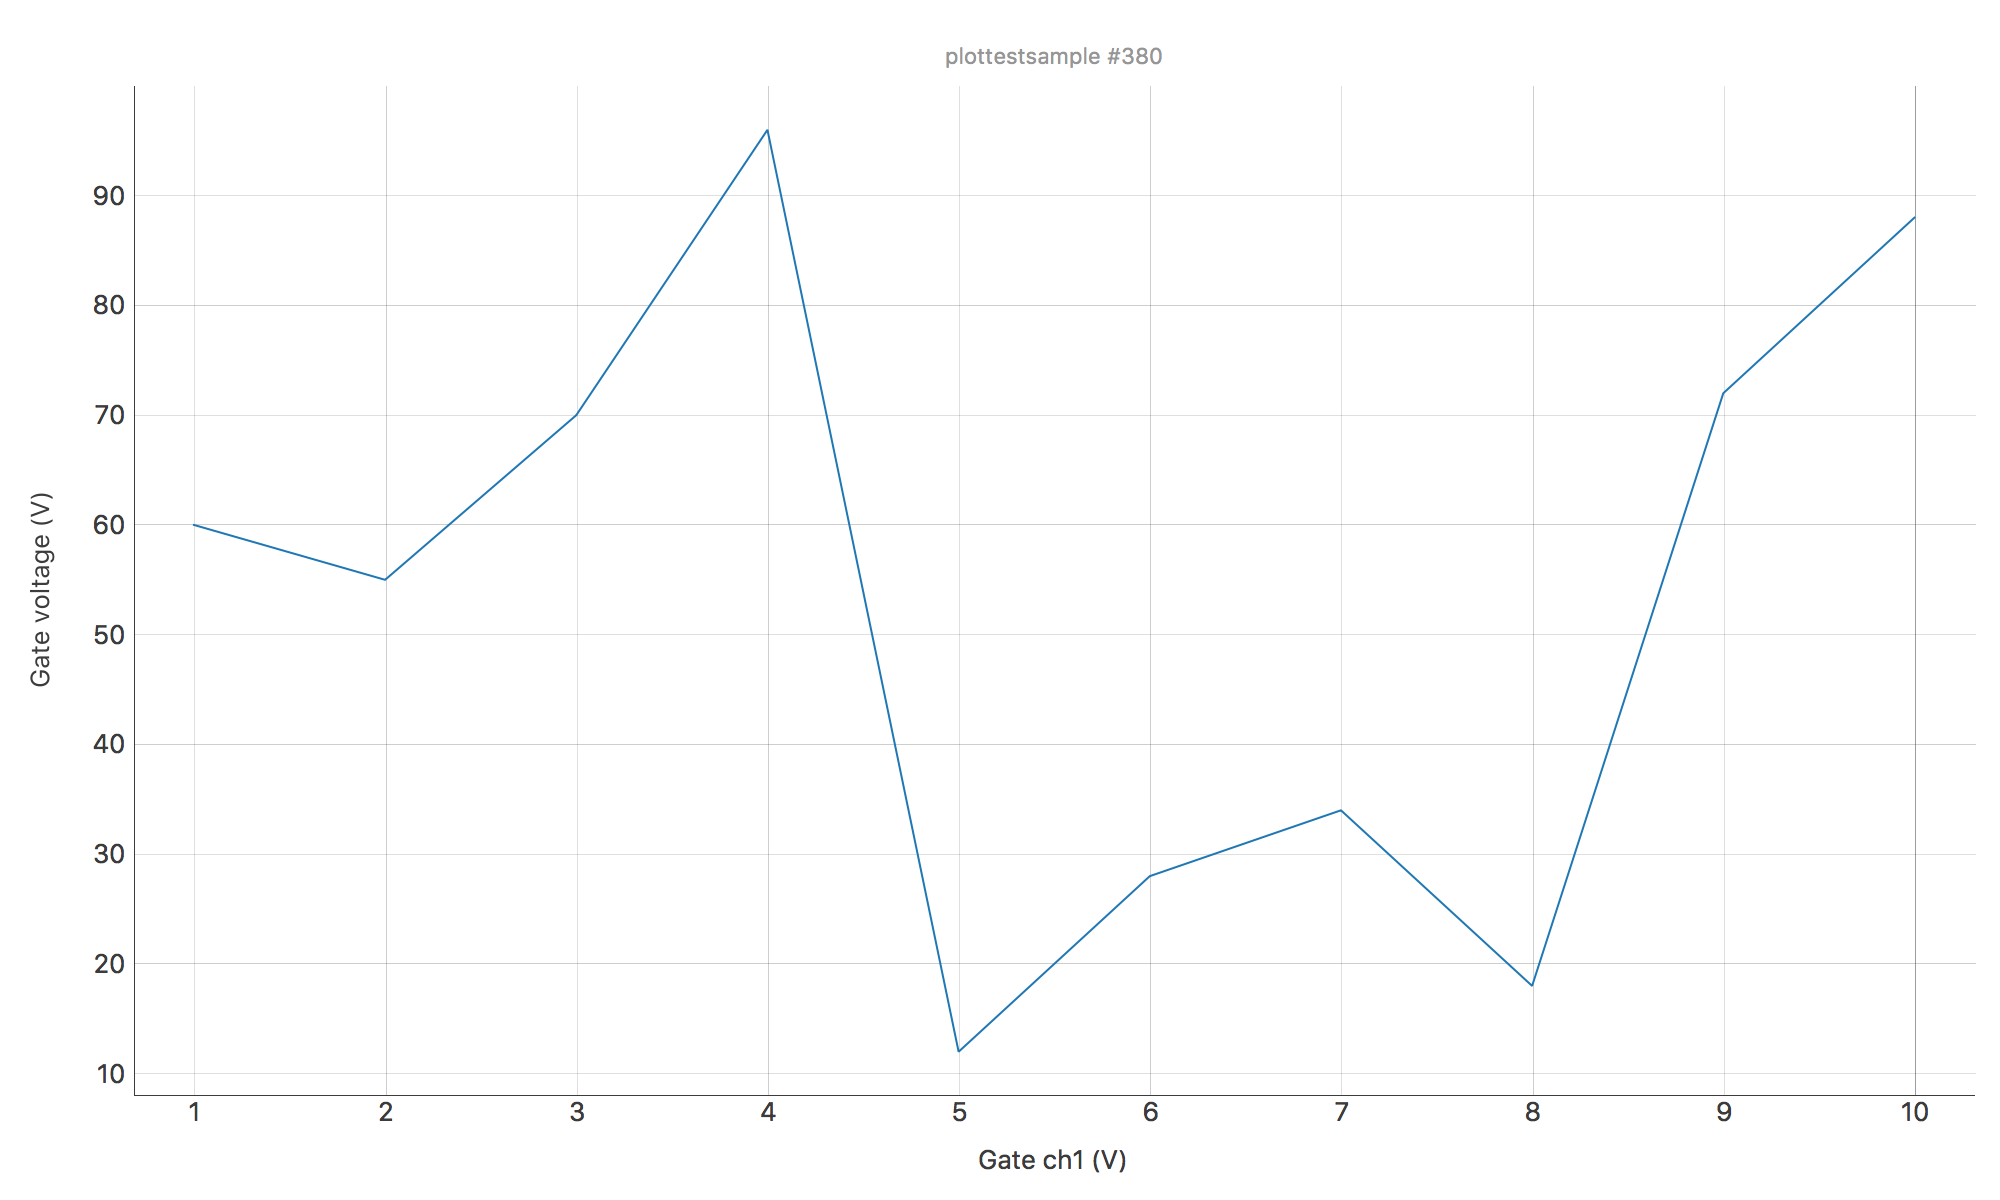

In [11]:
# Normal SI Units, normal interval, sloooow acquisition. Zoom out/pan and check autozoom
# Expected labels: 
#     Y: Gated Voltage (V), X: Gate ch1 (V)
plot, data = do1d(dac.ch1, 1, 10, 10, 1, dmm.voltage)
plot

## Non-standard `do1d`

Started at 2017-07-10 15:57:41
Printing the number 1
Printing the number 2
Printing the number 3
Printing the number 4
Printing the number 5
Printing the number 6
Printing the number 7
Printing the number 8
Printing the number 9
Printing the number 10
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/363'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (10,)
   Measured | dmm_voltage | voltage      | (10,)
Finished at 2017-07-10 15:57:42


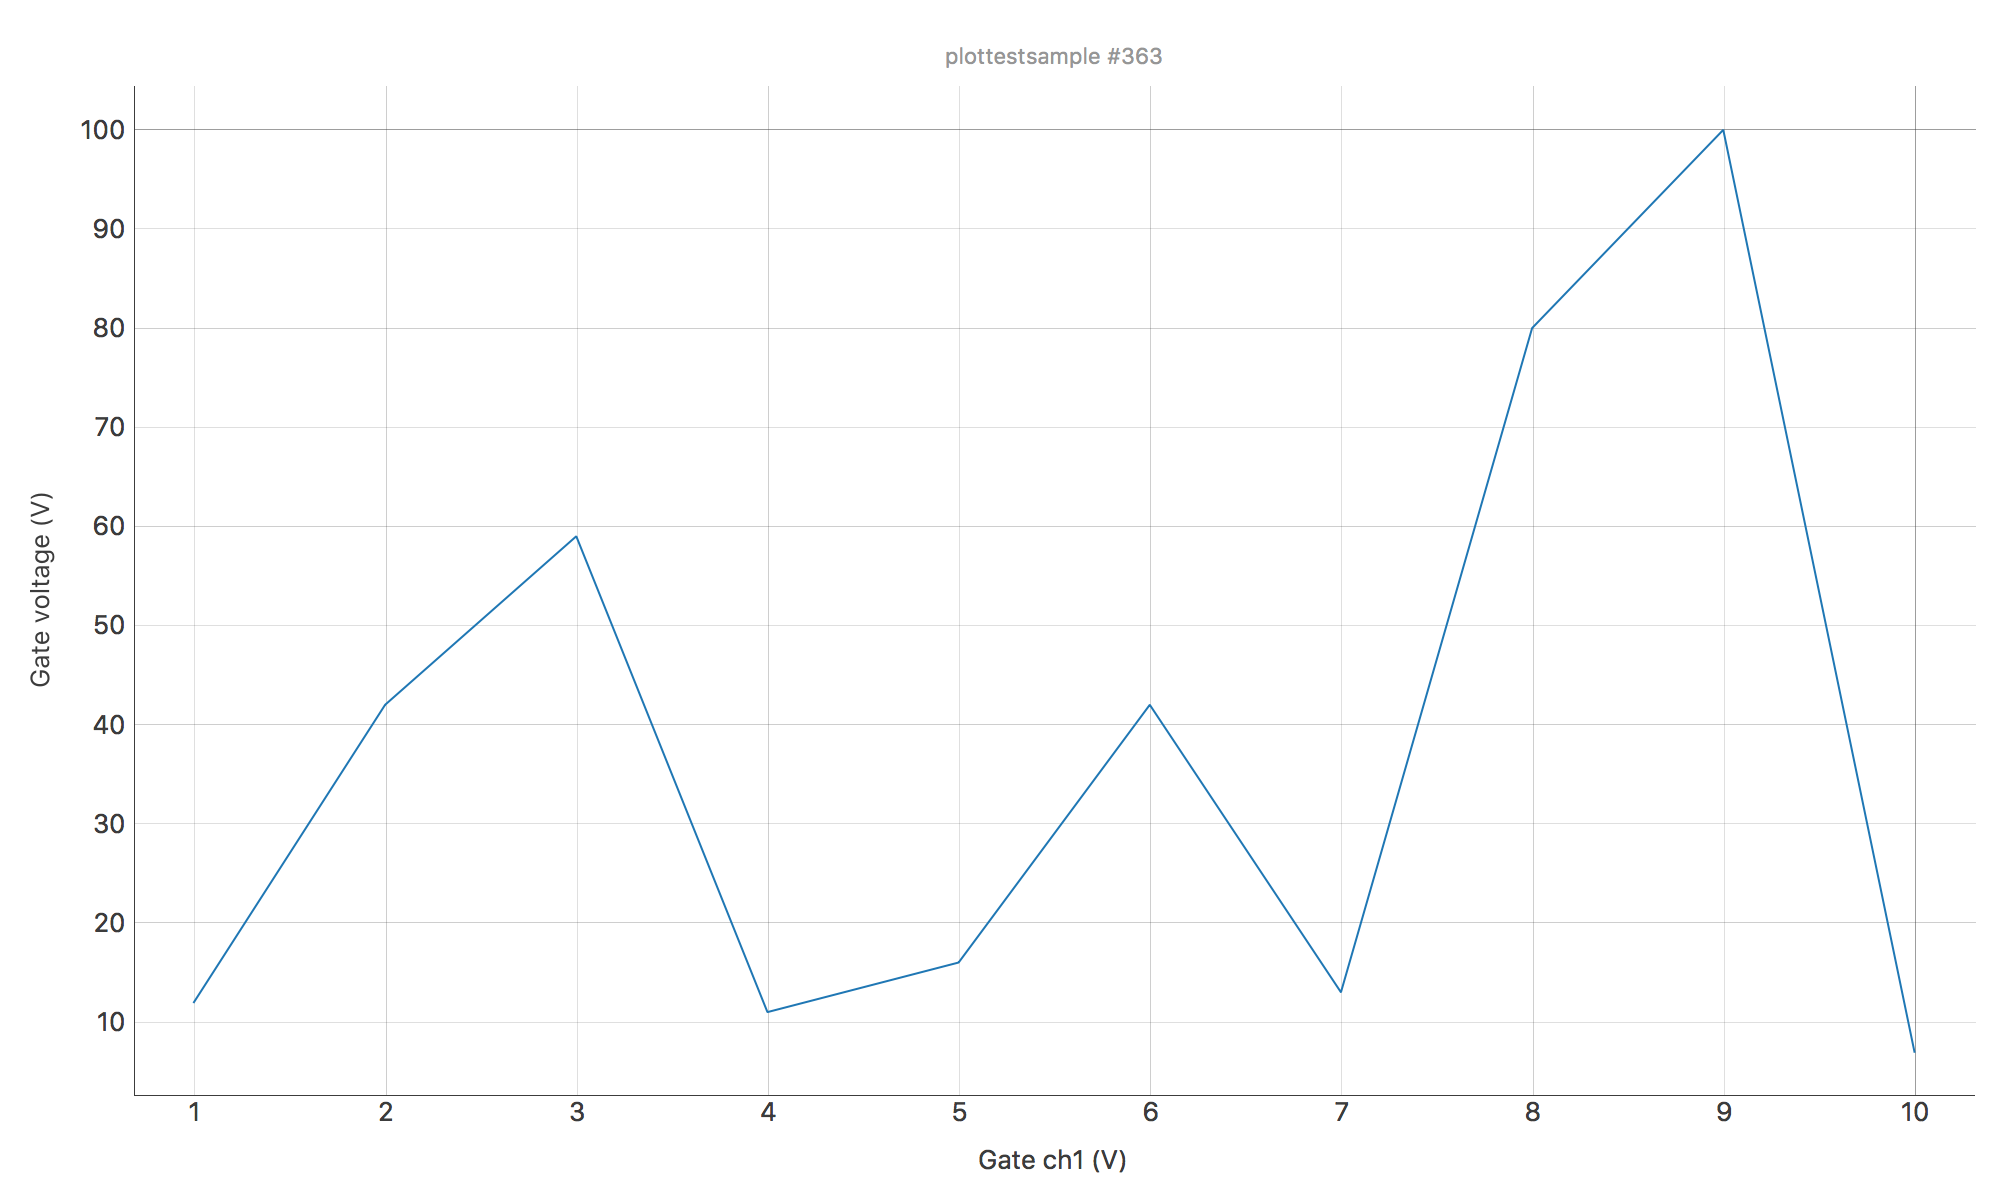

In [12]:
# Adding a non-measurement task to ensure that this does not screw up things
def printer():
    n = 0
    def _core():
        nonlocal n
        n += 1
        print('Printing the number {}'.format(n))
    return _core

printtask = qc.Task(printer())
plot, data = do1d(dac.ch1, 1, 10, 10, 0.1, dmm.voltage, printtask)
plot

Started at 2017-07-10 15:57:48
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/364'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (100,)
   Measured | dmm_voltage | voltage      | (100,)
   Measured | dmm_current | current      | (100,)
Finished at 2017-07-10 15:58:04


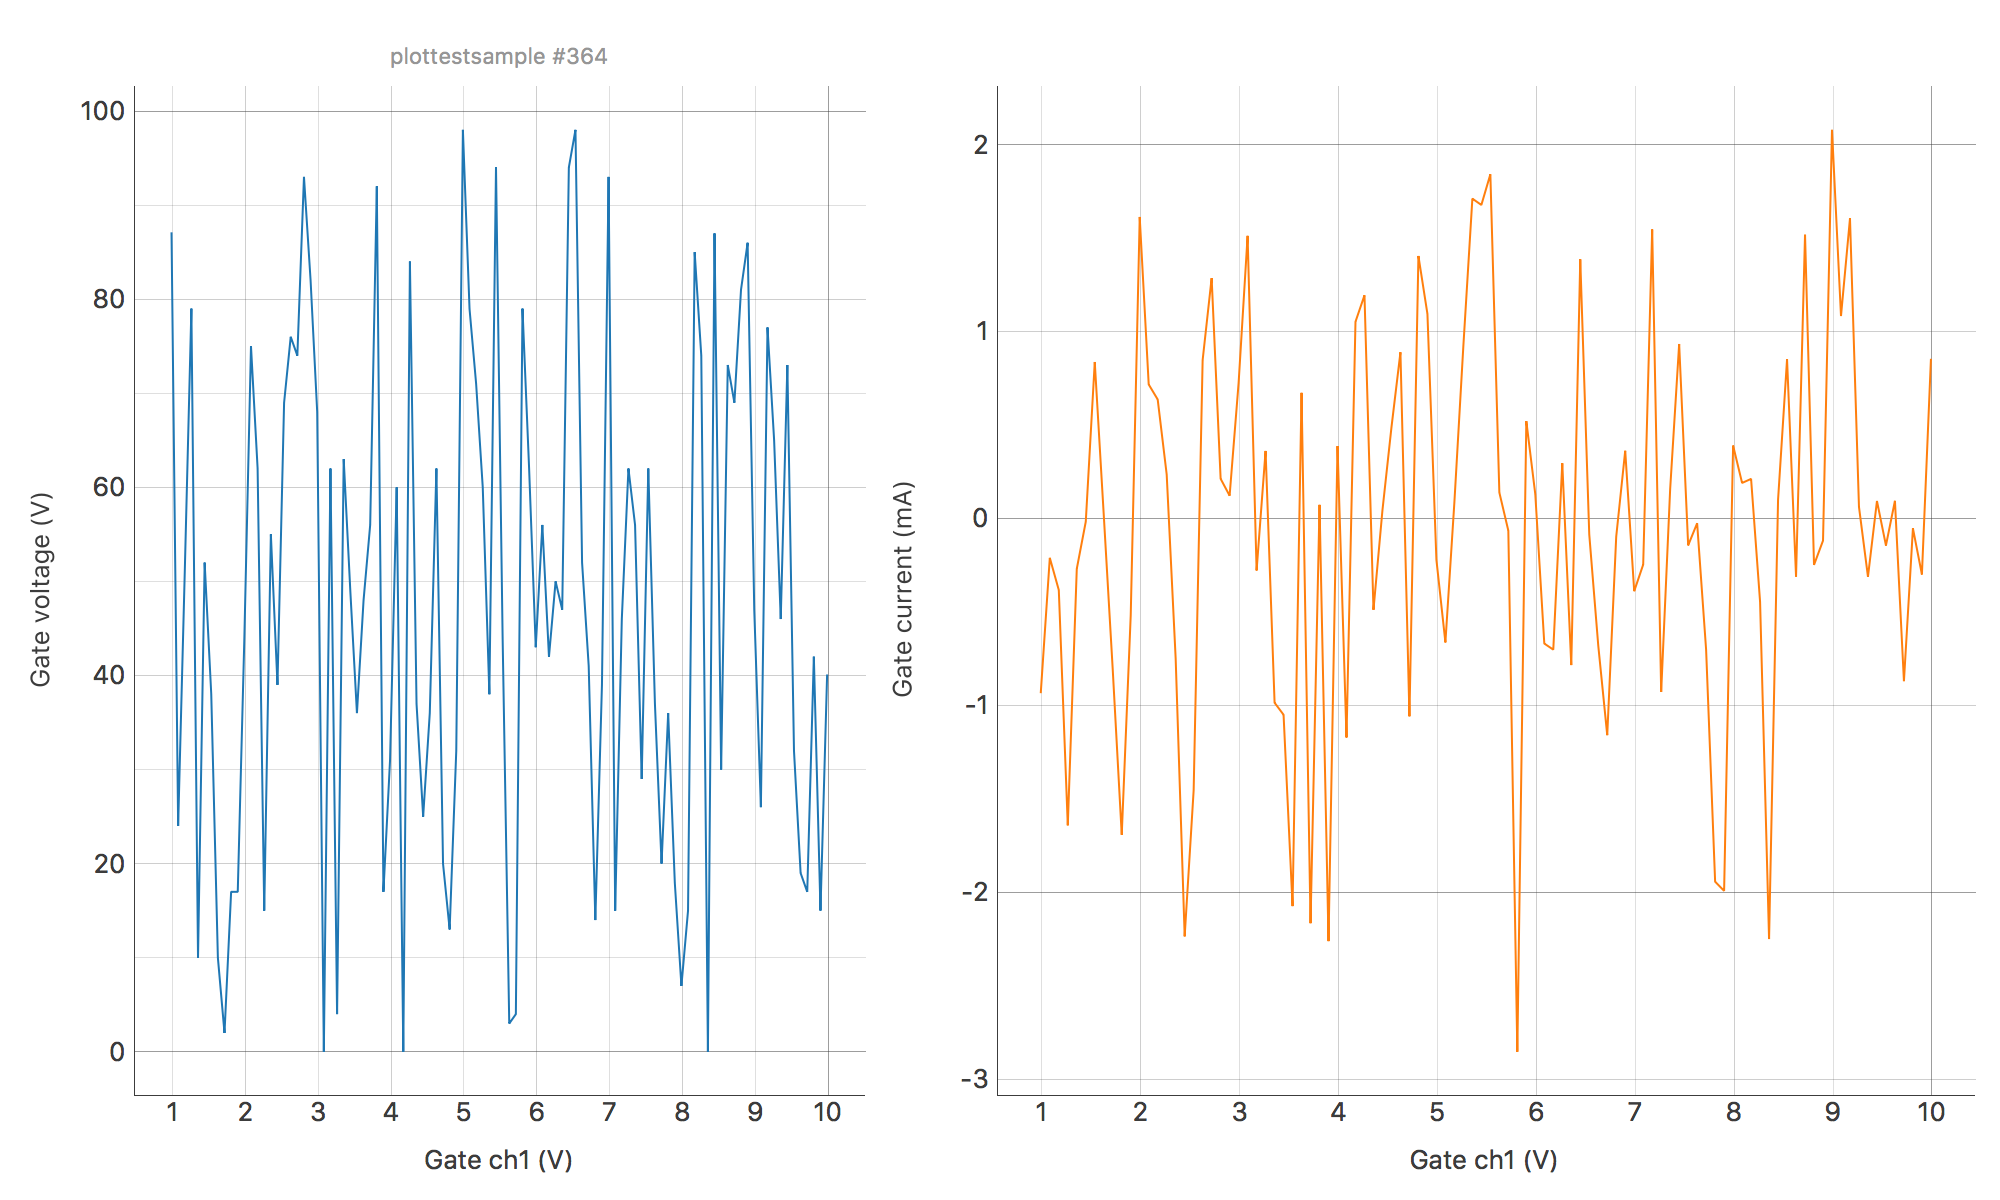

In [13]:
# Expected:
#    Left plot. X: Gate ch1 (V), Y: Gate voltage (V)
#    Right plot. X: Gate ch1 (V), Y: Gate current (mA)
plot, data = do1d(dac.ch1, 1, 10, 100, 0.01, dmm.voltage, dmm.current)
plot

In [14]:
dmm.current.unit = 'electrons/second'

# Expected:
#    Left plot. X: Gate ch1 (V), Y: Gate voltage (V)
#    Right plot. X: Gate ch1 (V), Y: Gate current (electrons/second)
plot, data = do1d(dac.ch1, 1, 10, 100, 0.01, dmm.voltage, dmm.current)
plot

dmm.current.unit = 'A'

Started at 2017-07-10 15:58:14
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/365'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (100,)
   Measured | dmm_voltage | voltage      | (100,)
   Measured | dmm_current | current      | (100,)
Finished at 2017-07-10 15:58:33


## 2D Graphs

### `do1d` with array parameter

Started at 2017-07-10 15:58:43
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/366'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (50,)
   Measured | dmm_myarray | myarray      | (50, 25)
Finished at 2017-07-10 15:58:49


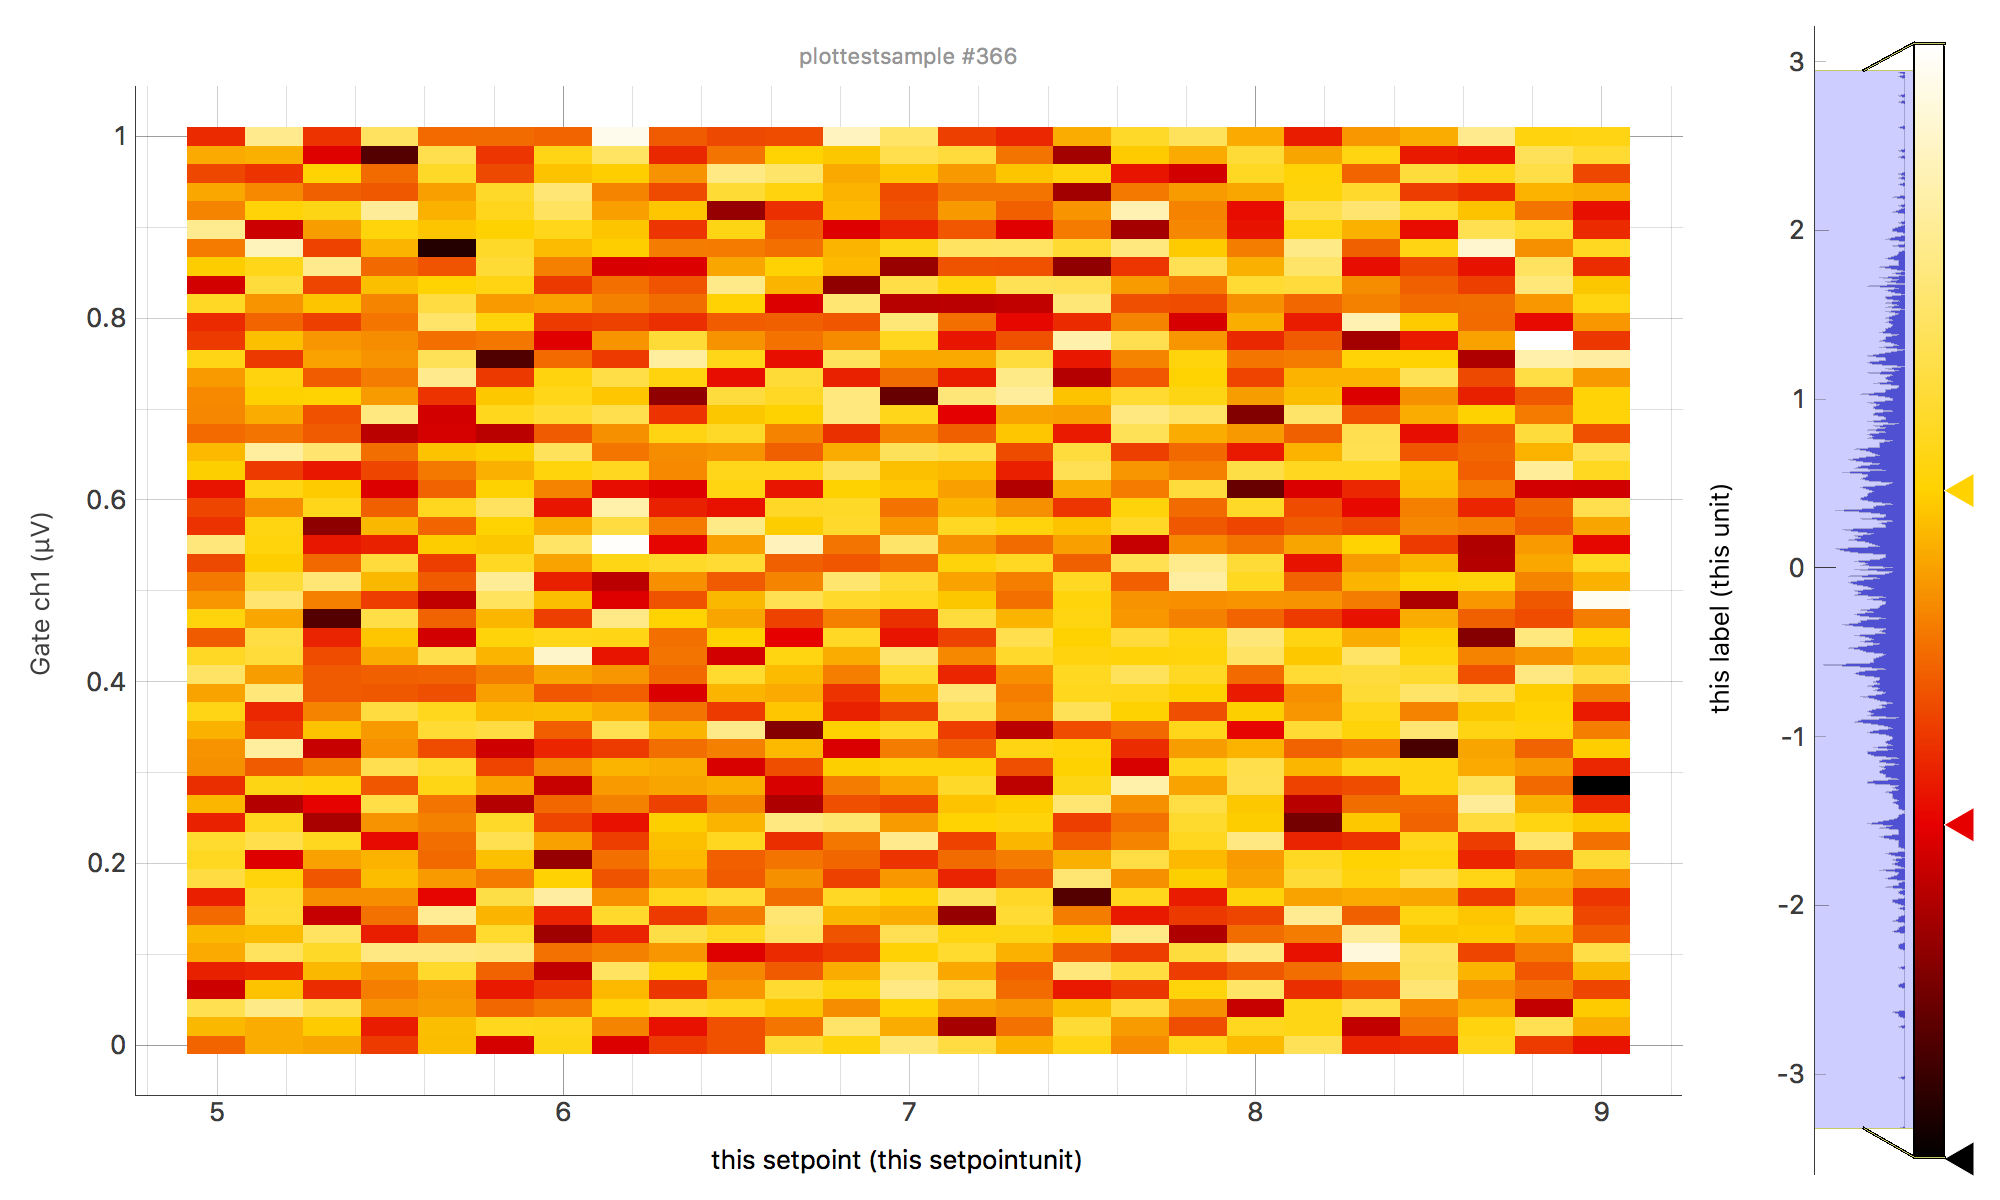

In [15]:
# Exceptional Units, small set range
# Expected labels: 
#     X: This setpoint (this setpointunit), Y: Gate ch1 (μV)

plot, data = do1d(dac.ch1, 0, 10e-7, 50, 0.01, dmm.myarray)

plot

Started at 2017-07-10 15:58:59
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/367'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (50,)
   Measured | dmm_myarray | myarray      | (50, 25)
Finished at 2017-07-10 15:59:05


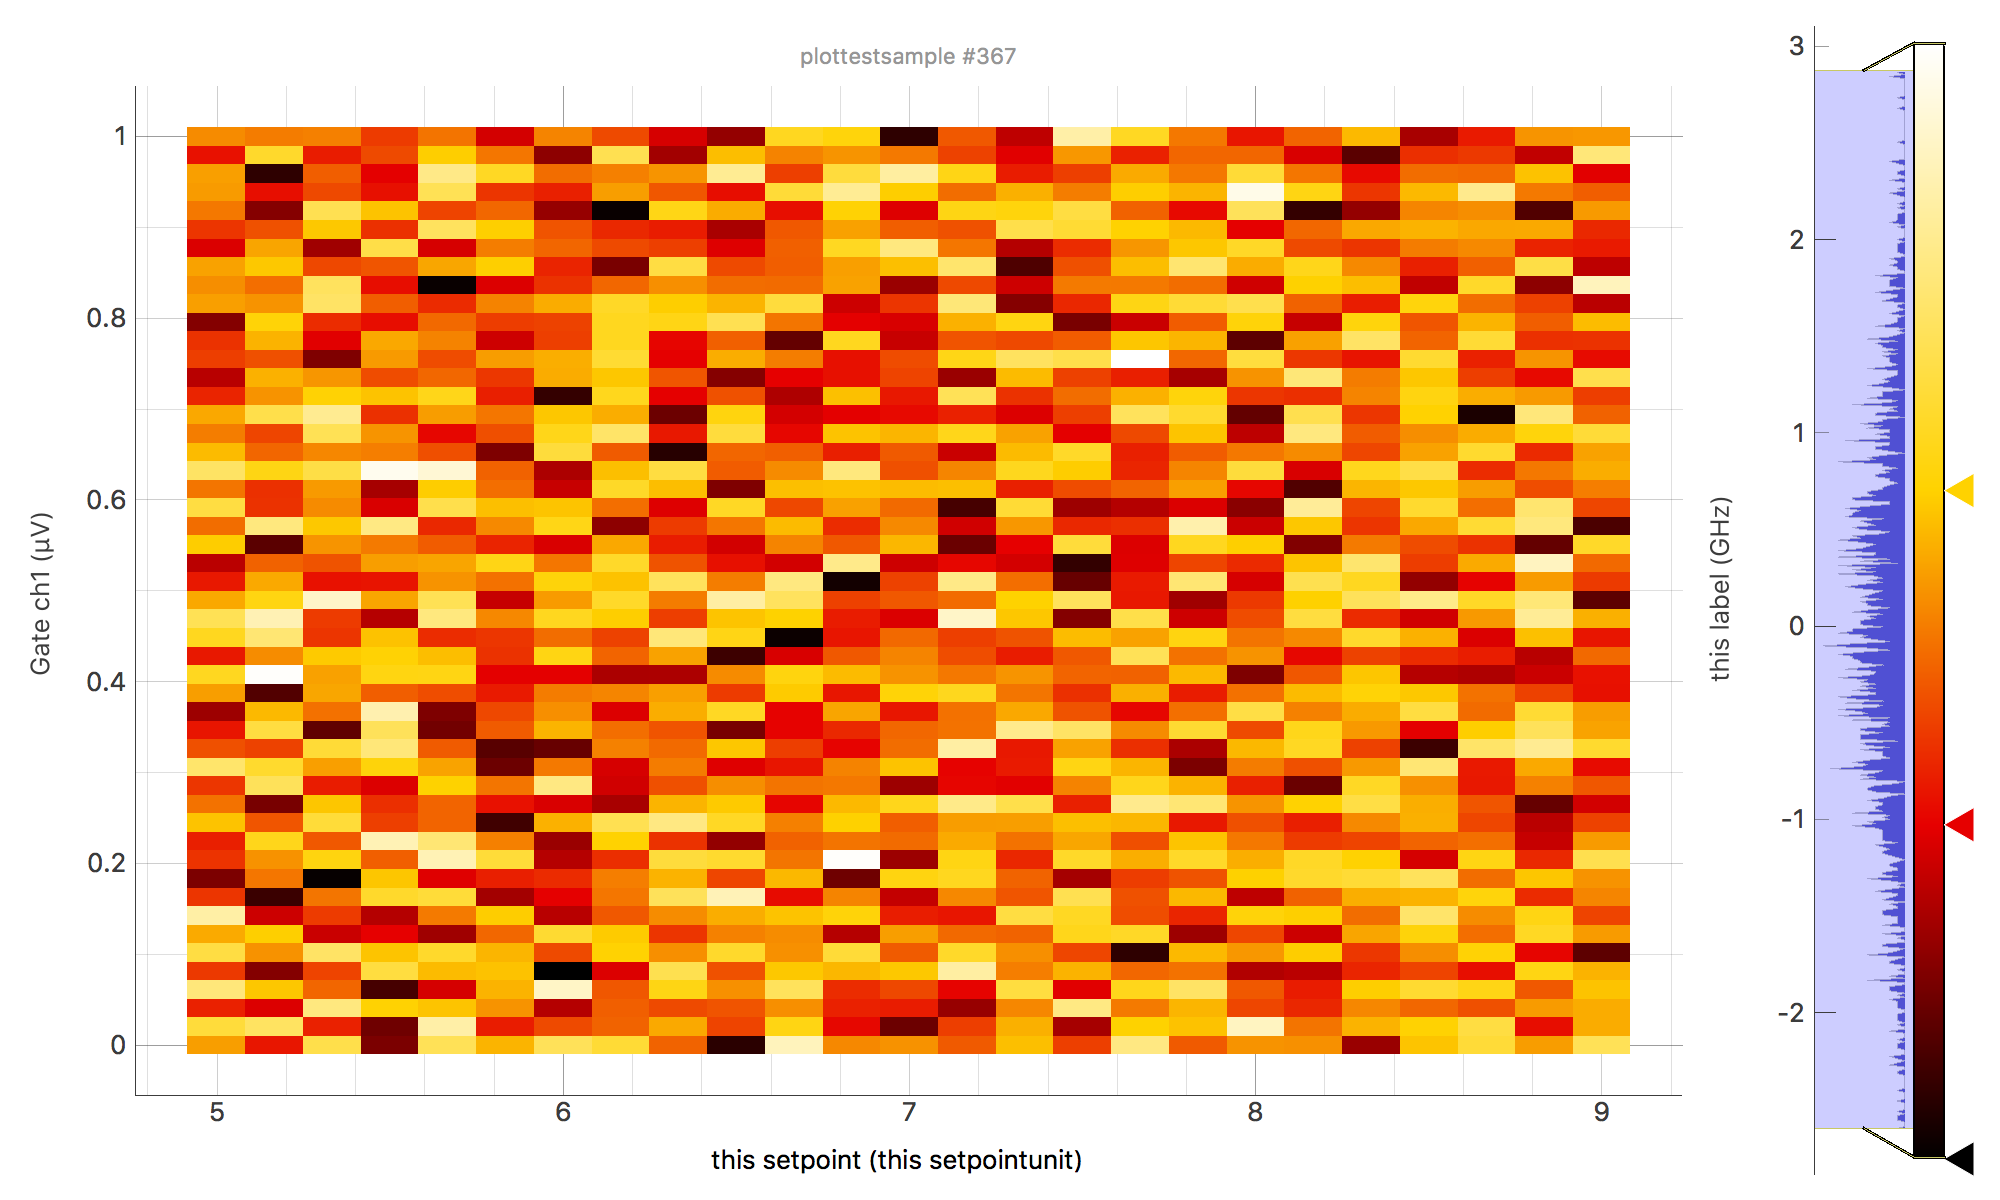

In [16]:
# Exceptional Units, small set range, large value range
# Expected labels: 
#     X: This setpoint (this setpointunit), Y: Gate ch1 (μV), Z: this label (GHz)

dmm.myarray.get_multiplier = 1e9
dmm.myarray.unit = 'Hz'

plot, data = do1d(dac.ch1, 0, 10e-7, 50, 0.01, dmm.myarray)

def get(self):
    item = np.random.randn(25)
    self._save_val(item)
    return item

dmm.myarray.get_multiplier = 1
dmm.myarray.unit = 'this unit'

plot

Started at 2017-07-10 15:59:18
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/368'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (3,)
   Measured | dmm_myarray | myarray      | (3, 25)
Finished at 2017-07-10 15:59:34


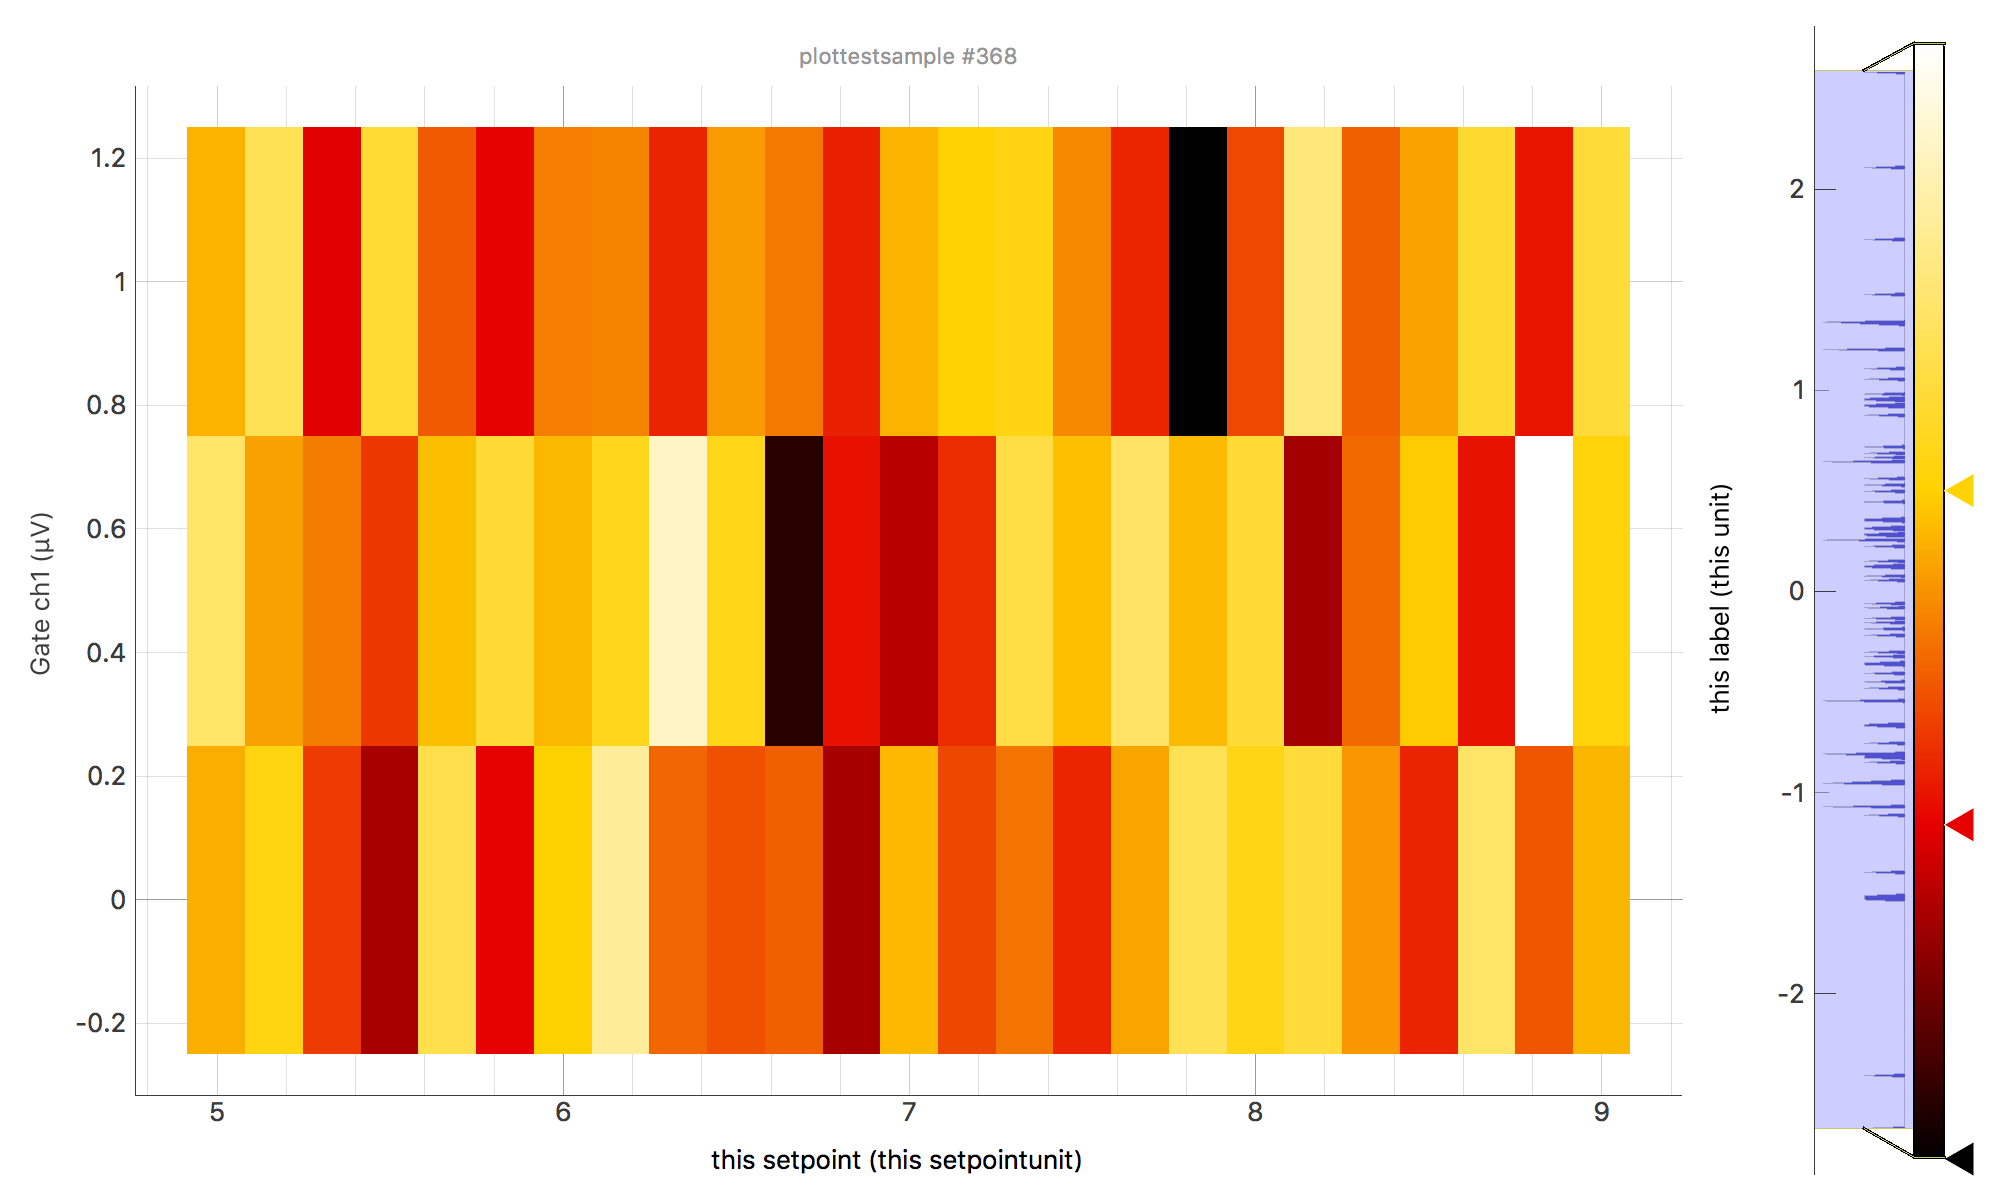

In [17]:
# Long delay, watch out for blank plot ranges and check autozoom
# Expected range:
#     X: 5-9 (this setpointunit), Y: 0-1 μV
# 
plot, data = do1d(dac.ch1, 0, 10e-7, 3, 5, dmm.myarray)

plot

Started at 2017-07-10 16:00:09
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/369'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (50,)
   Measured | dmm_voltage | voltage      | (50,)
   Measured | dmm_myarray | myarray      | (50, 25)
Finished at 2017-07-10 16:00:16


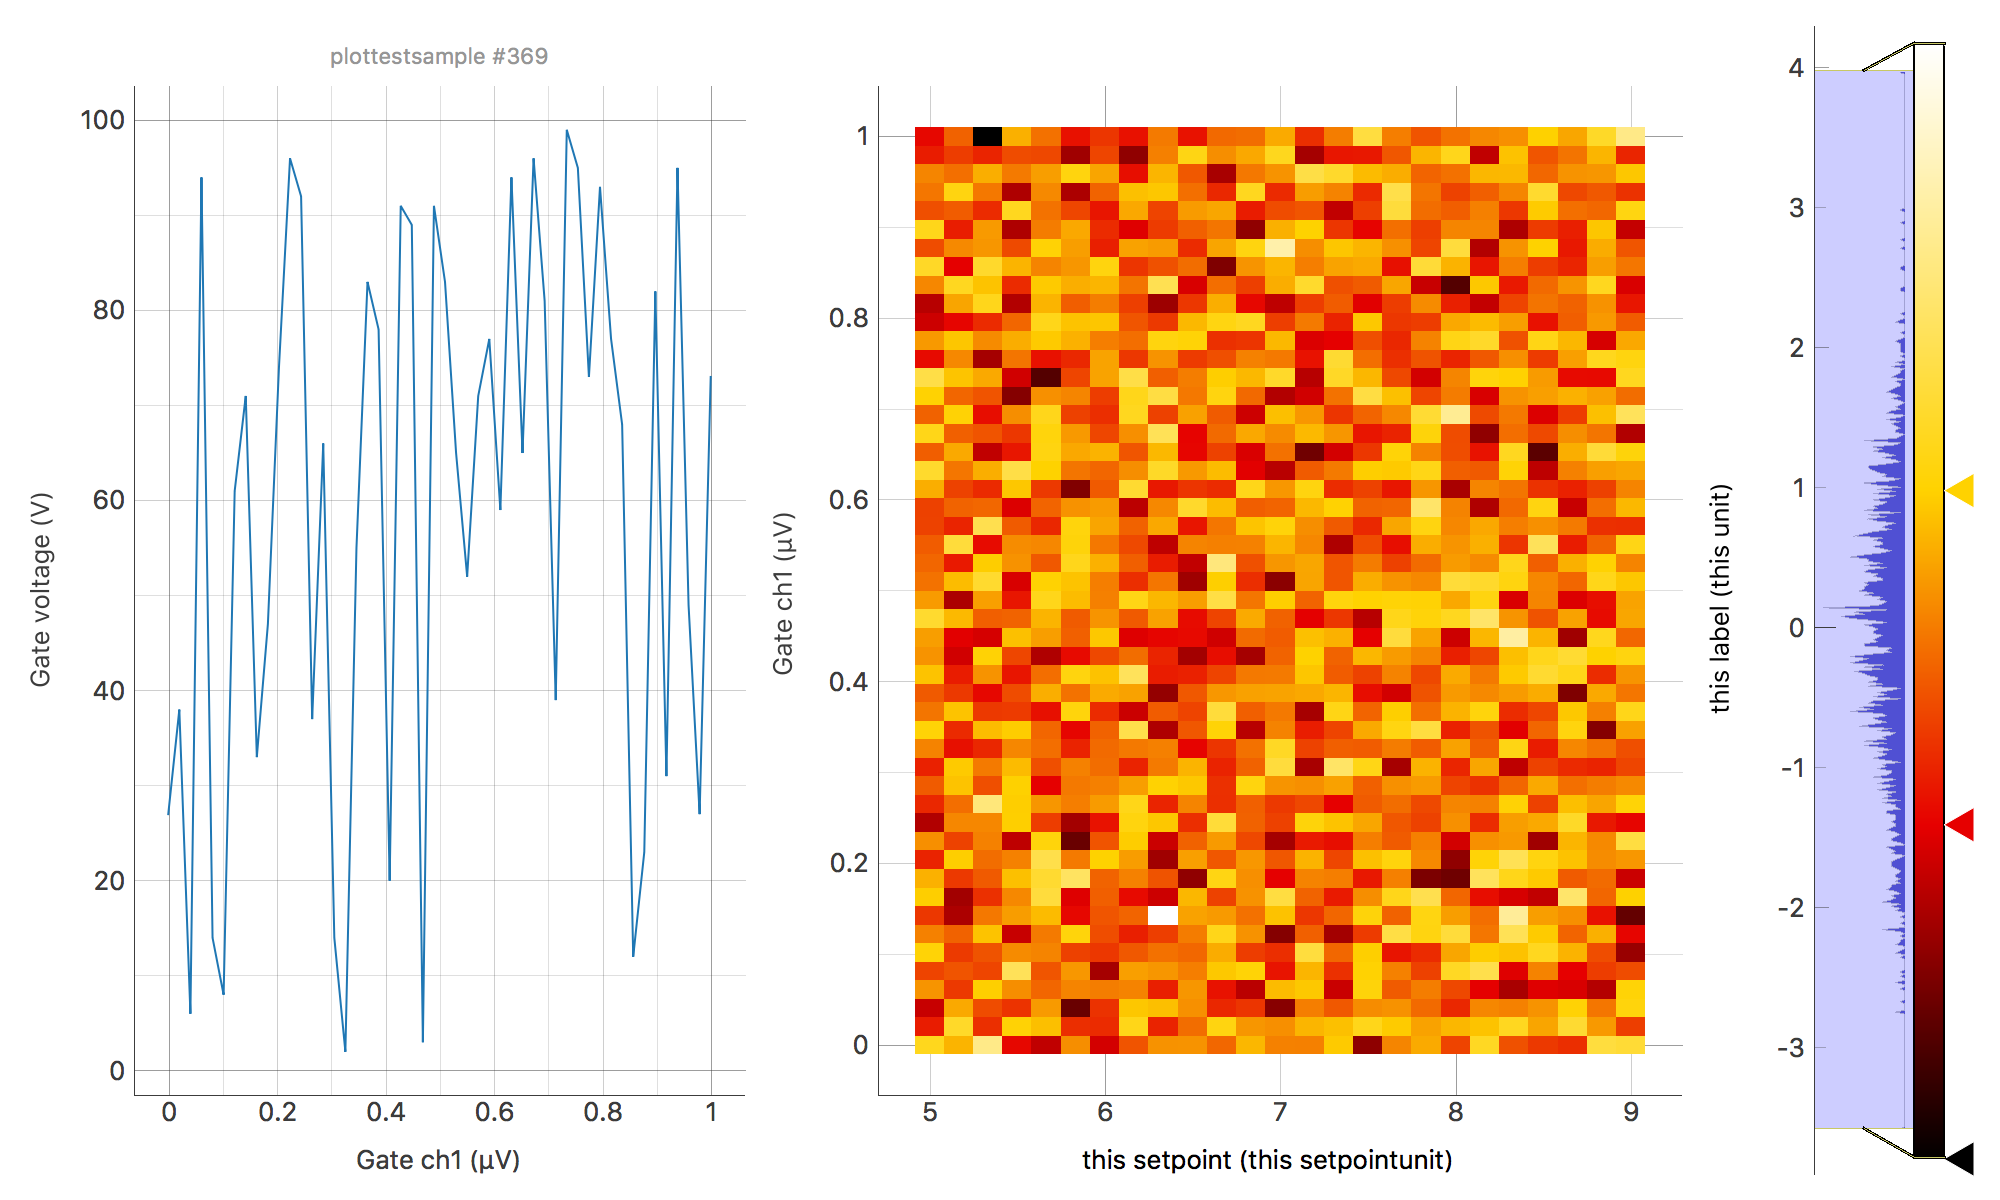

In [18]:
# Exceptional Units, small set range and additional line plot
# Expected labels: 
#     Line Plot:
#         X: Gate ch1 (μV), Y: Gate voltage (V)
#     Heat Map:
#         X: This setpoint (this setpointunit), Y: Gate ch1 (μV), Z: this label (this unit)

plot, data = do1d(dac.ch1, 0, 10e-7, 50, 0.01, dmm.voltage, dmm.myarray)

plot

DEBUG
['dmm_voltage', 'this_setpoint_set', 'dmm_myarray', 'dac_ch1_set'] dmm_voltage
Considering the units V, V
DEBUG
['dmm_voltage', 'this_setpoint_set', 'dmm_myarray', 'dac_ch1_set'] dmm_myarray
Considering the units V, V
Started at 2017-06-30 14:25:36
DataSet:
   location = '/Users/william/sourcecodes/qdev-dk/docs/examples/PlotTesting/plottestsample/097'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (50,)
   Measured | dmm_voltage | voltage      | (50,)
   Measured | dmm_myarray | myarray      | (50, 25)
Finished at 2017-06-30 14:25:42


/Users/william/.pyenv/versions/3.5.3/envs/qcodes-qdev/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


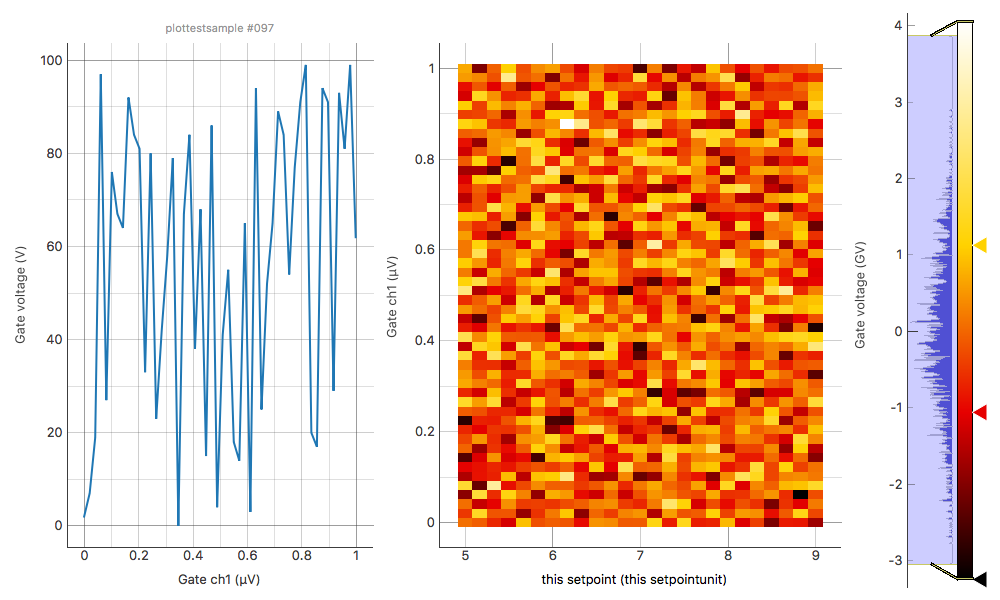

In [19]:
# Exceptional Units, small set range and additional line plot
# Expected labels: 
#     Line Plot:
#         X: Gate ch1 (μV), Y: Gate voltage (V)
#     Heat Map:
#         X: This setpoint (this setpointunit), Y: Gate ch1 (μV), Z: Gate voltage (GV)

dmm.myarray.label = 'Gate voltage'
dmm.myarray.get_multiplier = 1e9
dmm.myarray.unit = 'V'
plot, data = do1d(dac.ch1, 0, 10e-7, 50, 0.01, dmm.voltage, dmm.myarray)
dmm.myarray.label = 'this label'
dmm.myarray.get_multiplier = 1
dmm.myarray.unit = 'this unit'


plot

In [20]:
dmm.myarray.label

'this label'

### do1d with multiparameter

Started at 2017-07-10 17:15:03
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/371'
   <Type>   | <array_id>        | <array.name>  | <array.shape>
   Setpoint | dac_ch1_set       | ch1           | (50,)
   Setpoint | this_setpoint_set | this_setpoint | (50, 10)
   Measured | dmm_this          | this          | (50, 10)
   Measured | dmm_that          | that          | (50, 10)
Finished at 2017-07-10 17:15:13


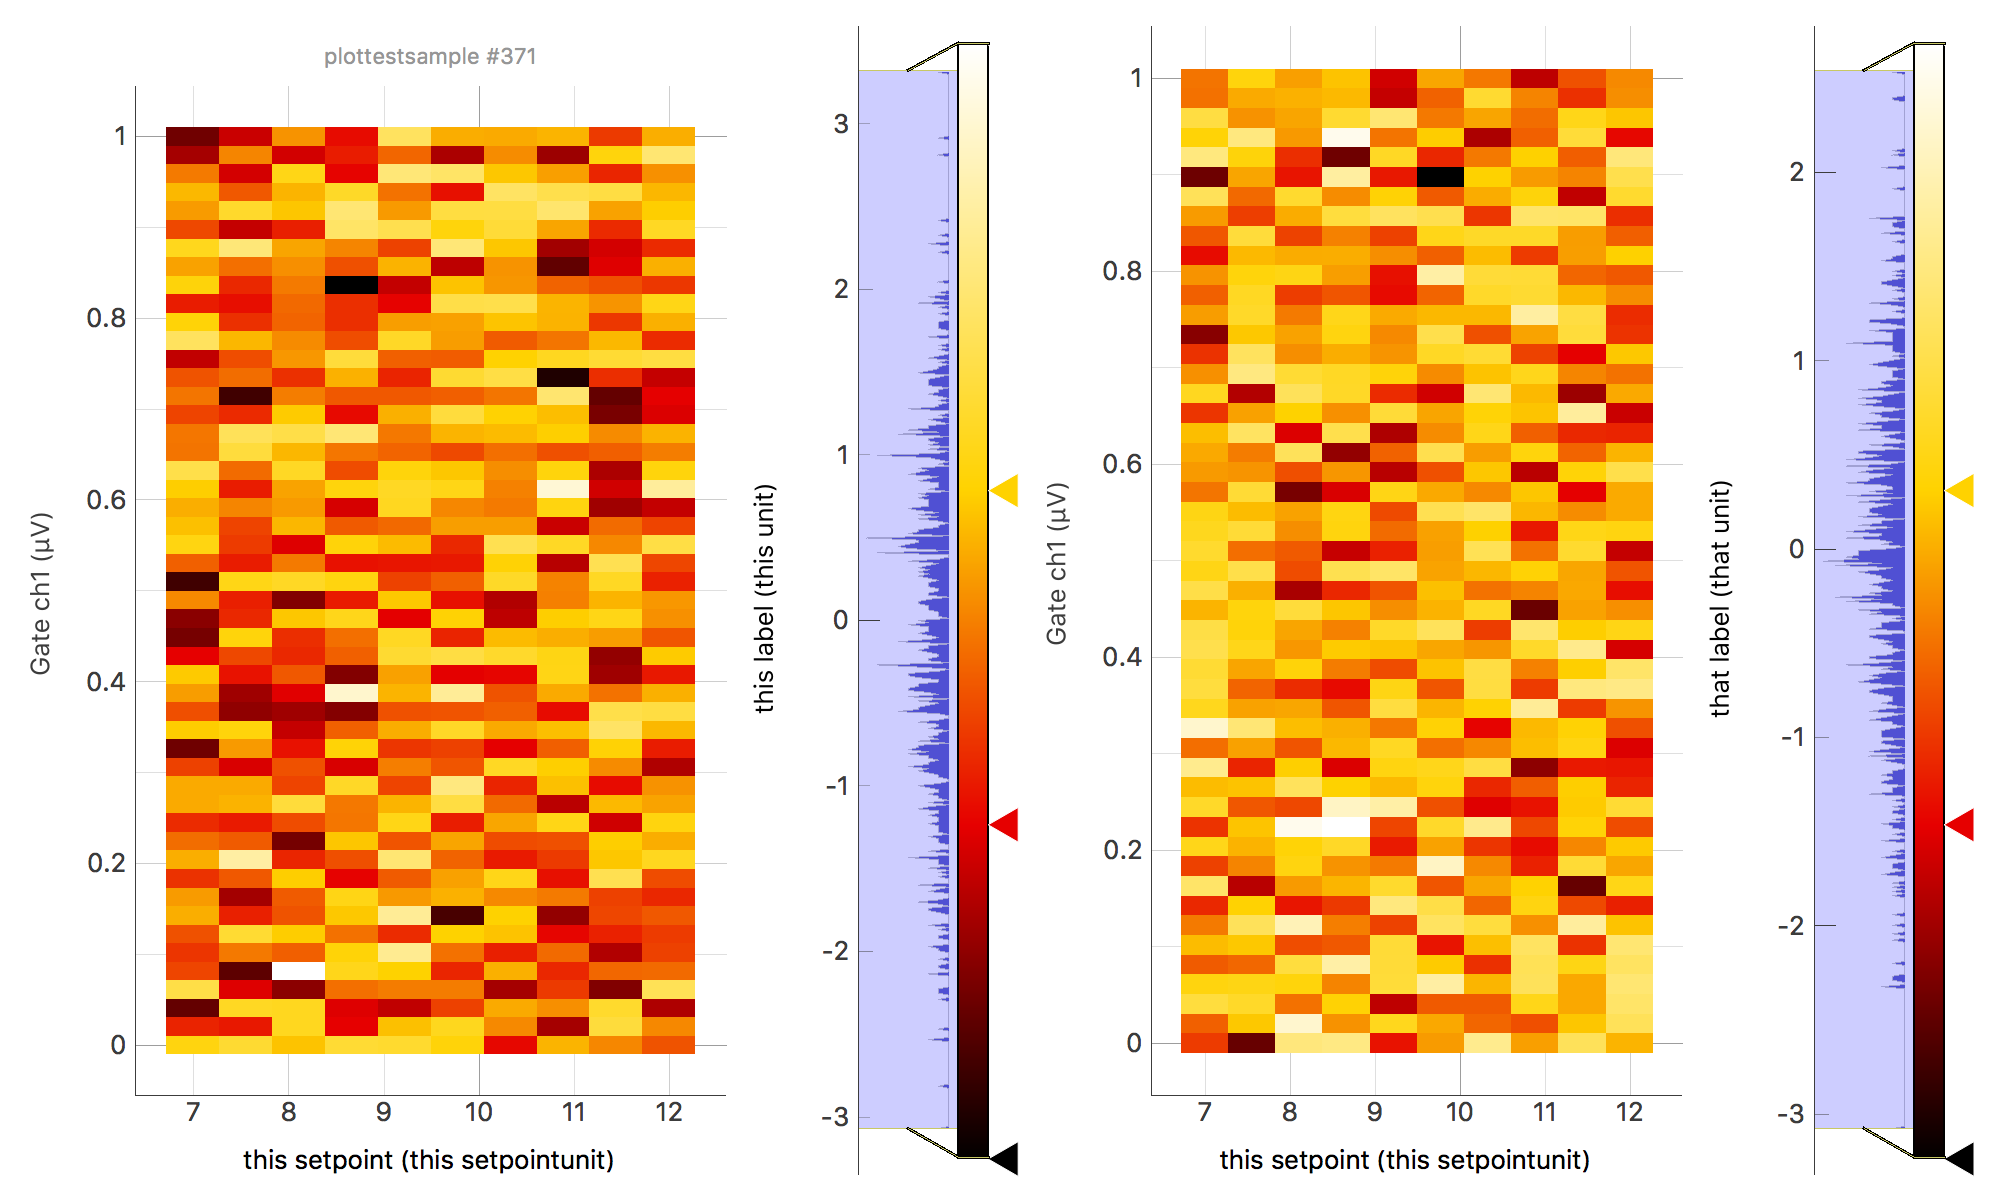

In [4]:
# Exceptional Units, small set range
# Expected labels: 
#     X: This setpoint (this setpointunit), Y: Gate ch1 (μV)
#     Two plots next to each other

plot, data = do1d(dac.ch1, 0, 10e-7, 50, 0.01, dmm.mymultiparameter)

plot

Started at 2017-07-10 17:20:31
DataSet:
   location = '/Users/jhn/src/Qcodes-dk/docs/examples/PlotTesting/plottestsample/374'
   <Type>   | <array_id>        | <array.name>  | <array.shape>
   Setpoint | dac_ch1_set       | ch1           | (50,)
   Setpoint | this_setpoint_set | this_setpoint | (50, 10)
   Measured | dmm_this          | this          | (50, 10)
   Measured | dmm_that          | that          | (50, 10)
Finished at 2017-07-10 17:20:41


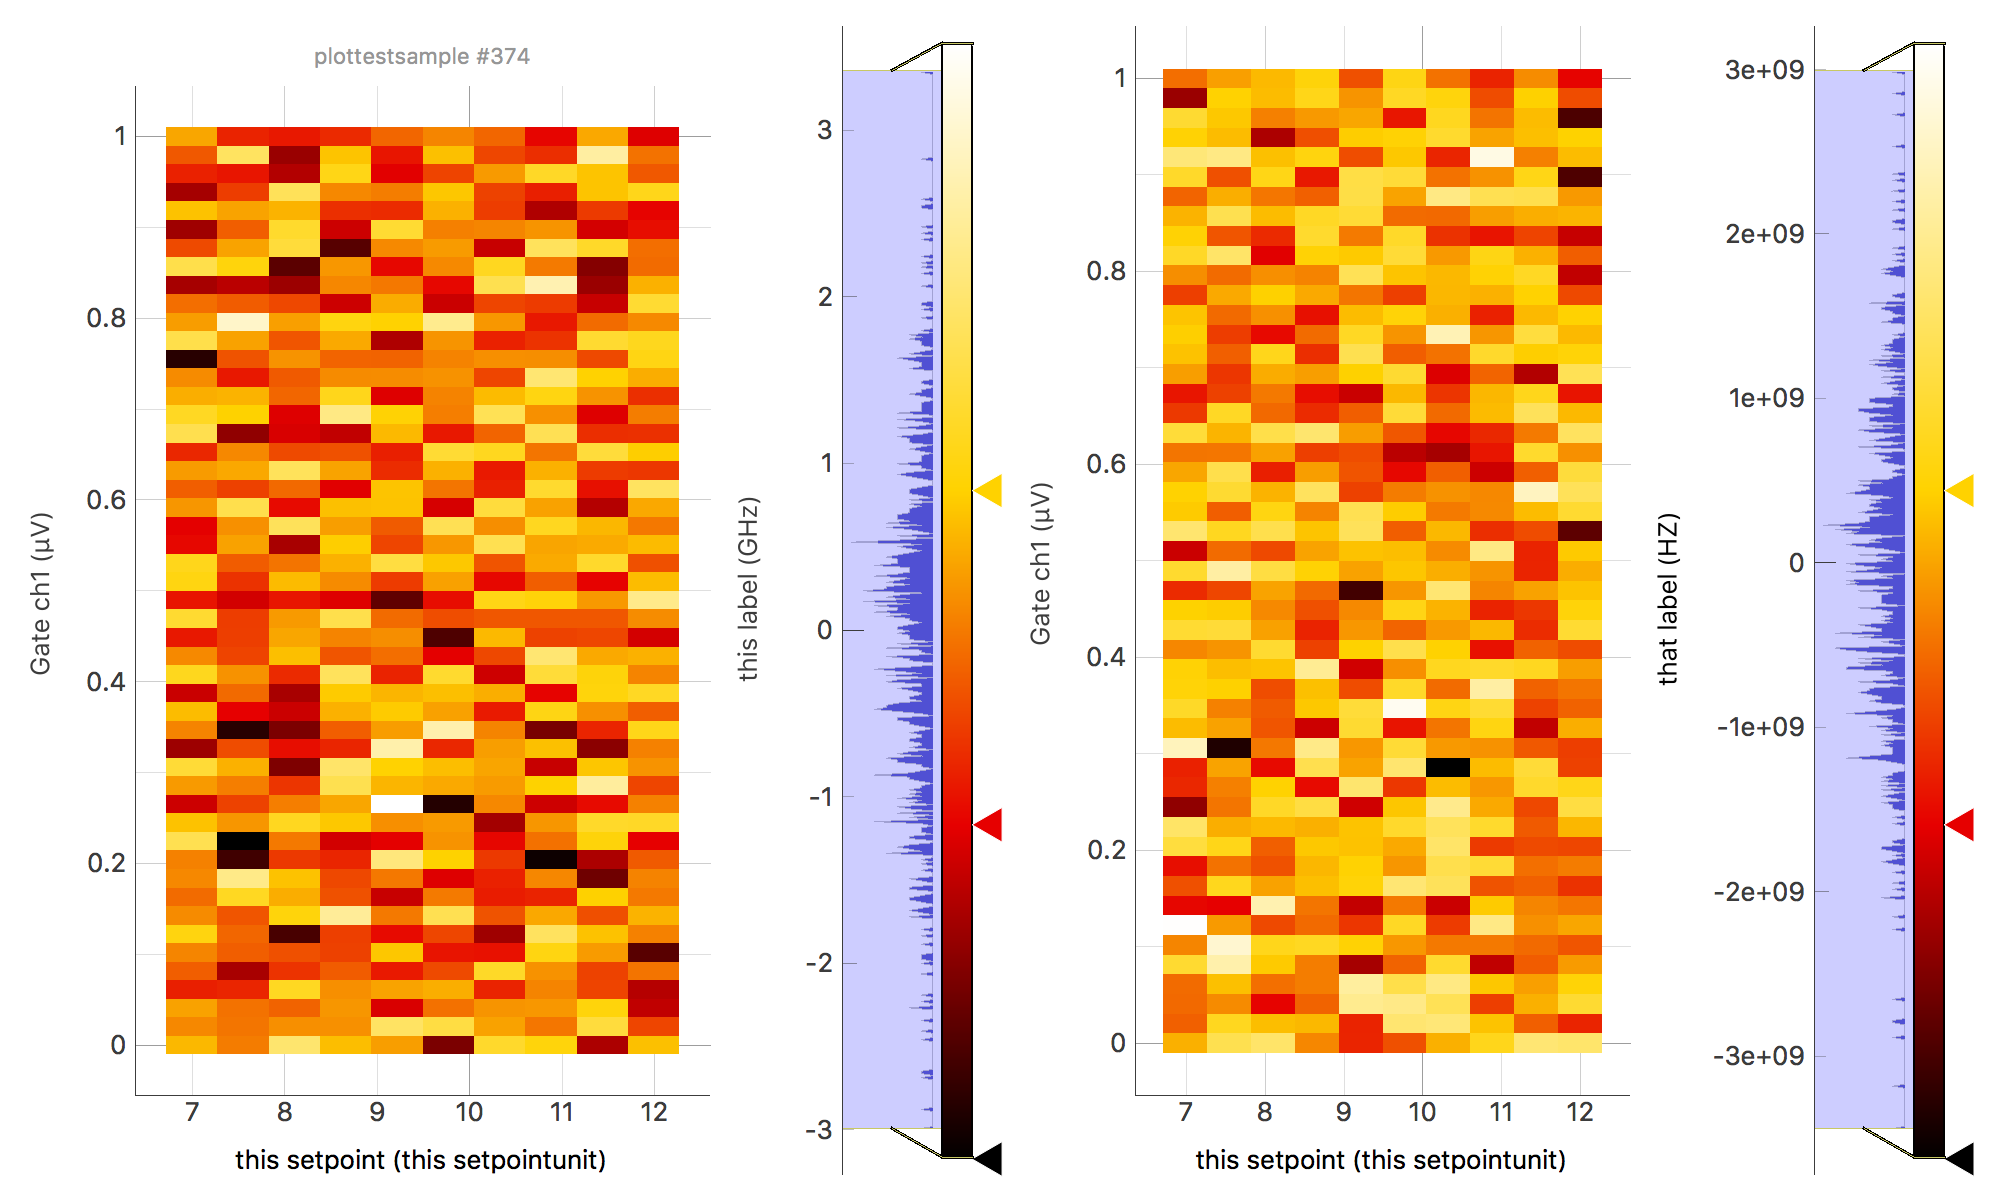

In [8]:
# Exceptional Units, small set range, large value range
# Expected labels: 
#     X: This setpoint (this setpointunit), Y: Gate ch1 (μV), Z: this label (GHz)
#     Two plots next to each other

dmm.mymultiparameter.get_multiplier = 1e9
dmm.mymultiparameter.units = ('Hz', 'HZ')

plot, data = do1d(dac.ch1, 0, 10e-7, 50, 0.01, dmm.mymultiparameter)

def get(self):
    item = np.random.randn(25)
    self._save_val(item)
    return item

dmm.mymultiparameter.get_multiplier = 1
dmm.mymultiparameter.units = ('this unit', 'that unit')

plot

## `do2d`

DEBUG
['dmm_voltage', 'dac_ch2_set', 'dac_ch1_set'] dmm_voltage
Considering the units V, V
Started at 2017-06-30 14:25:45
DataSet:
   location = '/Users/william/sourcecodes/qdev-dk/docs/examples/PlotTesting/plottestsample/098'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (100,)
   Setpoint | dac_ch2_set | ch2          | (100, 55)
   Measured | dmm_voltage | voltage      | (100, 55)
Finished at 2017-06-30 14:26:26


/Users/william/.pyenv/versions/3.5.3/envs/qcodes-qdev/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


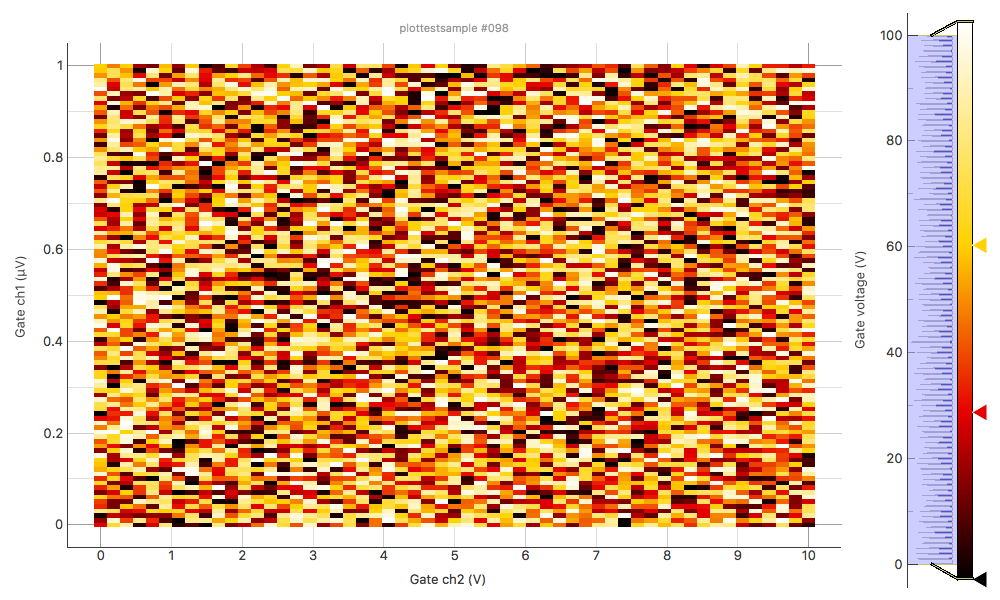

In [21]:
# Expected labels:
#     X: Gate ch2 (V), Y: Gate ch1 (μV), Z: Gate voltage (V)
# Check pan/autozoom
plot, data = do2d(dac.ch1, 0, 10e-7, 100, 0.005,
                  dac.ch2, 0, 10, 55, 0.005, dmm.voltage)
plot

DEBUG
['dmm_voltage', 'dac_ch2_set', 'dac_ch1_set'] dmm_voltage
Considering the units V, V
Started at 2017-06-30 14:26:27
DataSet:
   location = '/Users/william/sourcecodes/qdev-dk/docs/examples/PlotTesting/plottestsample/099'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (100,)
   Setpoint | dac_ch2_set | ch2          | (100, 55)
   Measured | dmm_voltage | voltage      | (100, 55)
Finished at 2017-06-30 14:27:46


/Users/william/.pyenv/versions/3.5.3/envs/qcodes-qdev/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


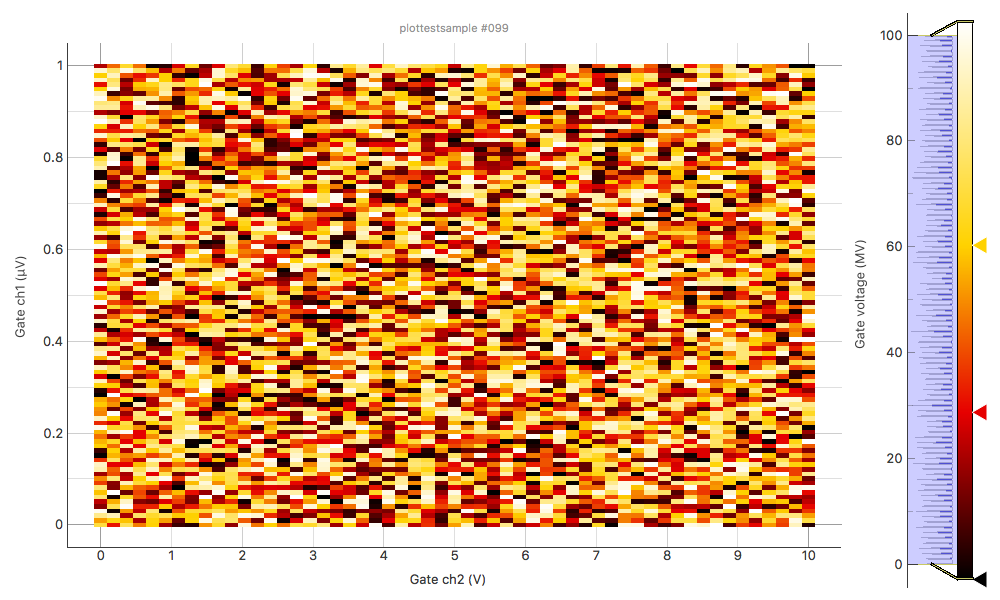

In [22]:
# Expected labels:
#     X: Gate ch2 (V), Y: Gate ch1 (μV), Z: Gate voltage (MV)
# Check pan/autozoom
dmm.voltage.get = lambda: 1e6*random.randint(0, 100)
plot, data = do2d(dac.ch1, 0, 10e-7, 100, 0.01,
                  dac.ch2, 0, 10, 55, 0.01,
                  dmm.voltage)
dmm.voltage.get = lambda: random.randint(0, 100)
plot

## `do1dDiagonal`

DEBUG
['dmm_voltage', 'dac_ch2', 'dac_ch1_set'] dmm_voltage
Considering the units V, V
Started at 2017-06-30 14:27:48
DataSet:
   location = '/Users/william/sourcecodes/qdev-dk/docs/examples/PlotTesting/plottestsample/100'
   <Type>   | <array_id>  | <array.name> | <array.shape>
   Setpoint | dac_ch1_set | ch1          | (50,)
   Measured | dmm_voltage | voltage      | (50,)
   Measured | dac_ch2     | ch2          | (50,)
Finished at 2017-06-30 14:27:51


/Users/william/.pyenv/versions/3.5.3/envs/qcodes-qdev/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


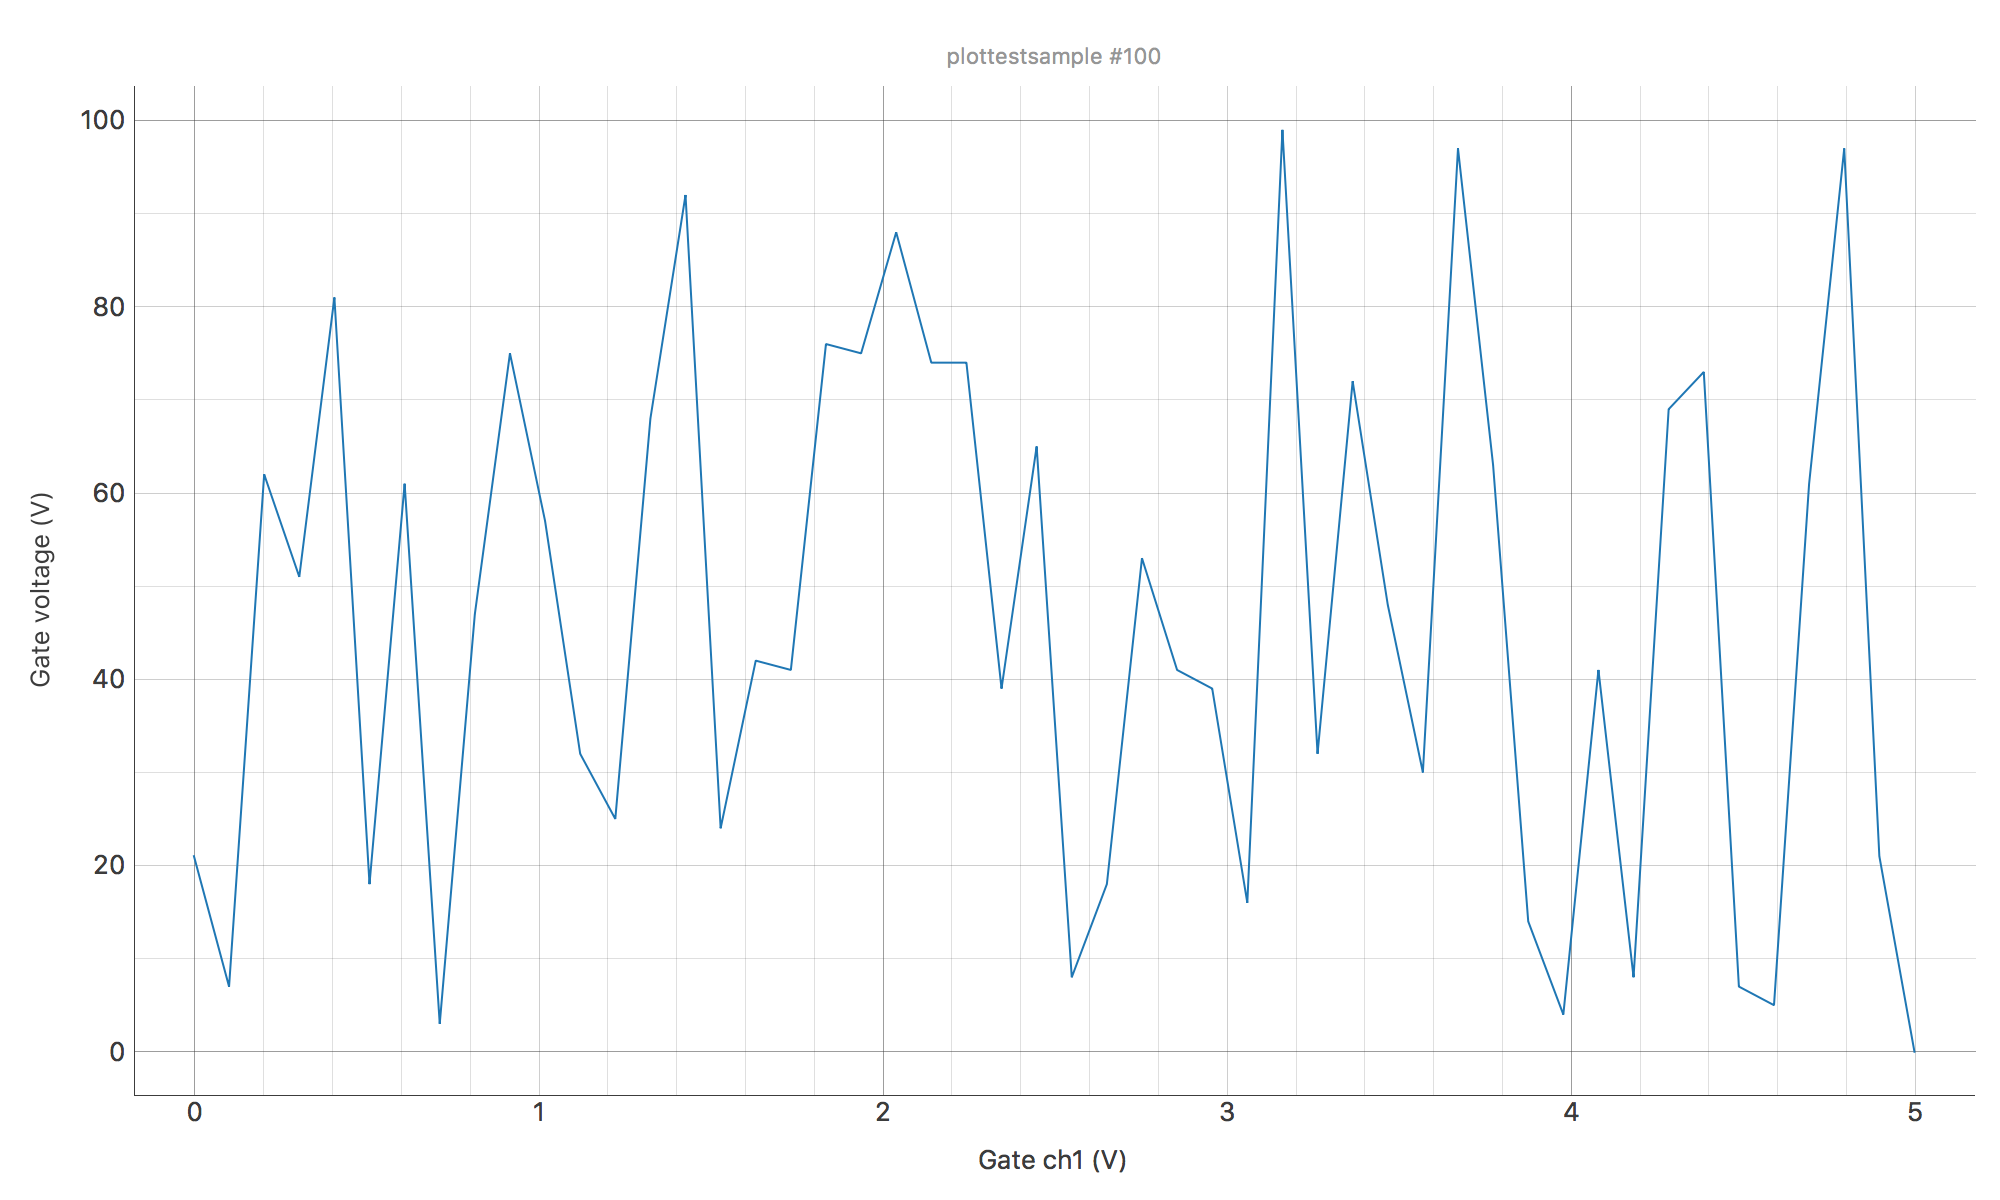

In [23]:
plot, data = do1dDiagonal(dac.ch1, dac.ch2, 0, 5, 50, 0.01,
                          0, 0.2, 
                          dmm.voltage)
plot